In [1]:
#!conda install -c conda-forge pyarrow -y

In [2]:
#!conda install -c plotly plotly -y

In [3]:
#!conda install -c anaconda seaborn -y

In [4]:
#!conda install -c conda-forge cufflinks-py -y

In [15]:
import pandas as pd
import numpy  as np
from datetime import datetime, date
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go

# Visualização
import matplotlib.pyplot as plt
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import *

import seaborn as sns
import cufflinks as cf
from plotly.offline import plot, iplot
import plotly.offline as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.express as px
import plotly.subplots as sp

#from datetime import datetime
from dateutil.relativedelta import relativedelta



In [5]:
#!conda install -c anaconda openpyxl -y

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Carregar o arquivo Excel
xls = pd.ExcelFile('Exercicio_Python_CRM .xlsx')

# Obter os nomes das abas
sheet_names = xls.sheet_names

# Para cada aba, ler o schema e as primeiras 10 linhas
for sheet in sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet, nrows=10)
    # print(f"Schema para {sheet}:")
    # print(df.dtypes)
    # print(f"Primeiras 10 linhas para {sheet}:")
    # print(df.head(10))


import openpyxl

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de transações
ws = wb['Transações']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_t = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_t.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_t[col].dtype == 'object':
        # Remova os espaços em branco no início e no final
        df_t[col] = df_t[col].str.strip()

df_t['Promo'] = df_t['Promo'].astype(str)
cols = [col for col in df_t.columns if 'ID' not in col]
null_counts = df_t.isnull().sum()

![dbc](dbc.jpg)
![renner](renner.jpg)

# Análise da base de dados Exercicio_Python_CRM .xlsx 

##### Primeira parte da análise:
- análise descritiva da base de Transações
- agregação Ano e Mês
- KPI Ticket Médio
###### nesta primeira parte da análise é possível verificar que:
- a base apenas possui dados para 01-2022 até 09-2022 e depois 01-2023 até 09-2023 faltando o último trimestre dos dois anos; época de Natal!
- as vendas de 2023 apenas se recuperaram no terceiro trimestre
- o ano de 2023 teve menos promoções e menos Unidades vendidas em relação a 2022, porém obteve um Valor Total maior indicando que houve um Ticket Médio maior em 2023 em relação a 2022
- o Ticket Médio de 2023 foi sempre maior que 2022 no agregado mês a mês
 

In [17]:
import plotly.io as pio

In [18]:
#!conda install -c anaconda nbformat -y

In [19]:
import nbformat

In [10]:
#!pip install -U kaleido

In [20]:
import kaleido as kd

In [21]:
import plotly.graph_objects as go
# Definindo a paleta de cores Pastel2
pastel2 = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

# Criando colunas para o mês e o ano
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month

# Agrupando os dados por ano e mês
grouped = df_t.groupby(['Year', 'Month']).sum().reset_index()

# Criando a figura
fig = go.Figure()

# Adicionando o gráfico de barras para 'ValorTotal'
for i, year in enumerate(grouped['Year'].unique()):
    fig.add_trace(go.Bar(x=grouped[grouped['Year'] == year]['Month'], 
                         y=grouped[grouped['Year'] == year]['ValorTotal'], 
                         name='ValorTotal ' + str(year),
                         marker_color=pastel2[i % len(pastel2)]))  # Use a cor correspondente da paleta

# Adicionando o gráfico de linha para 'UnidadesVendidas'
for i, year in enumerate(grouped['Year'].unique()):
    line_color = '#ff0000' if year == 2023 else pastel2[(i + len(pastel2) // 2) % len(pastel2)]  # Use a cor vermelha para 2023
    fig.add_trace(go.Scatter(x=grouped[grouped['Year'] == year]['Month'], 
                             y=grouped[grouped['Year'] == year]['UnidadesVendidas'], 
                             name='UnidadesVendidas ' + str(year), 
                             yaxis='y2',
                             line_color=line_color))

# Configurando os eixos e a legenda
fig.update_layout(
    title={
        'text': "Unidades Vendidas e Valor Total por Mês e Ano",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
    xaxis=dict(title='Month'),
    yaxis=dict(title='ValorTotal'),
    yaxis2=dict(title='UnidadesVendidas', overlaying='y', side='right'),
    autosize=False,
    width=1200,  # Aumenta a largura da figura
    height=500,  # Aumenta a altura da figura
    legend=dict(
        x=1.1,  
        y=1,  # Posiciona a legenda no topo
        bgcolor='rgba(255, 255, 255, 0)',  # Fundo transparente para a legenda
        bordercolor='rgba(255, 255, 255, 0)'  # Borda transparente para a legenda
    )
)

fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure2.png')

###### - As unidades vendidas de 2023 só crescem no terceiro semestre, assim como o valor total. O comportamento é praticamente o inverso de 2022

___

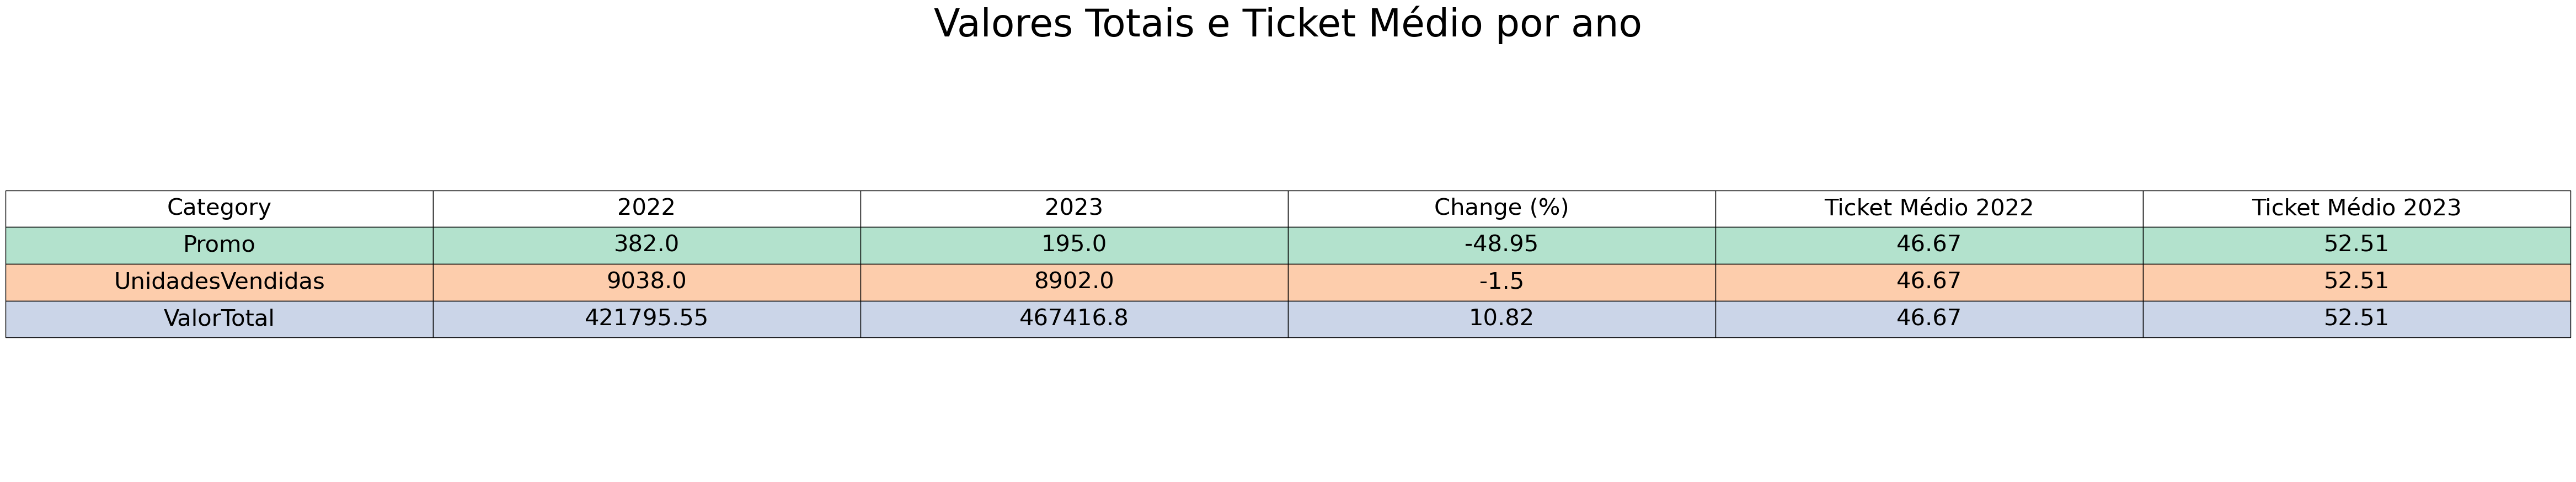

In [22]:
# Preenchendo os valores nulos na coluna 'Promo' com 0
df_t['Promo'] = df_t['Promo'].fillna(0)

# Convertendo a coluna 'Promo' para float, substituindo NaNs por 0 e depois convertendo para inteiro
df_t['Promo'] = np.nan_to_num(df_t['Promo'].astype(float)).astype(int)

# Filtrando os dados para os anos de 2022 e 2023
df_t['Year'] = df_t['Data'].dt.year
df_t['Month'] = df_t['Data'].dt.month
df_filtered = df_t[df_t['Year'].isin([2022, 2023])]

# Criando a tabela agregada
pivot = df_filtered.pivot_table(index='Month', columns='Year', values=['ValorTotal', 'UnidadesVendidas', 'Promo'], aggfunc='sum')

# Adicionando a linha com o valor total
pivot.loc['Total'] = pivot.sum()

# Extraindo a linha 'Total'
total_values = pivot.loc['Total']

# Transpondo a série para um DataFrame e resetando o índice
total_df = total_values.transpose().reset_index()

# Renomeando as colunas
total_df.columns = ['Category', 'Year', 'Value']

# Pivotando o DataFrame
pivot_total = total_df.pivot(index='Category', columns='Year', values='Value')

# Calculando a mudança percentual
pivot_total['Change (%)'] = (pivot_total[2023] - pivot_total[2022]) / pivot_total[2022] * 100

pivot_total['Ticket Médio 2022'] = pivot_total[2022]['ValorTotal'] / pivot_total[2022]['UnidadesVendidas']
pivot_total['Ticket Médio 2023'] = pivot_total[2023]['ValorTotal'] / pivot_total[2023]['UnidadesVendidas']

import matplotlib.pyplot as plt

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 10))

# Add a title to the plot
ax.set_title('Valores Totais e Ticket Médio por ano', fontsize=50, pad=20)

# Rest of your code...
# Adicionando a tabela à figura
table_data = pivot_total.reset_index().round(2).values.tolist()
column_labels = pivot_total.reset_index().columns.tolist()

# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(30)  # Increase this value to increase the font size

# Aumentando a largura e altura geral da tabela
table.scale(4, 4)  # Increase the second value to increase the height of the rows

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(30)  # Increase this value to increase the font size of the headers

# Ajustando o tamanho da fonte da coluna 'DescProduto'
for key, cell in table.get_celld().items():
    if key[1] == 0:  # 0 é o índice da coluna 'DescProduto'
        cell.set_fontsize(30)  # Increase this value to increase the font size of the 'DescProduto' column
# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('pivot_total_table.png')


###### 
###### - praticamente metade das promoções em 2023 em relação a 2022
###### - queda nas unidades vendidas de 1,5% em 2023 em relação a 2022
###### - Aumento de faturamento - Valor Total de 10,82% em 2023 em relação a 2022
###### - Aumento do Ticket Médio em 2023 em relação a 2022

___

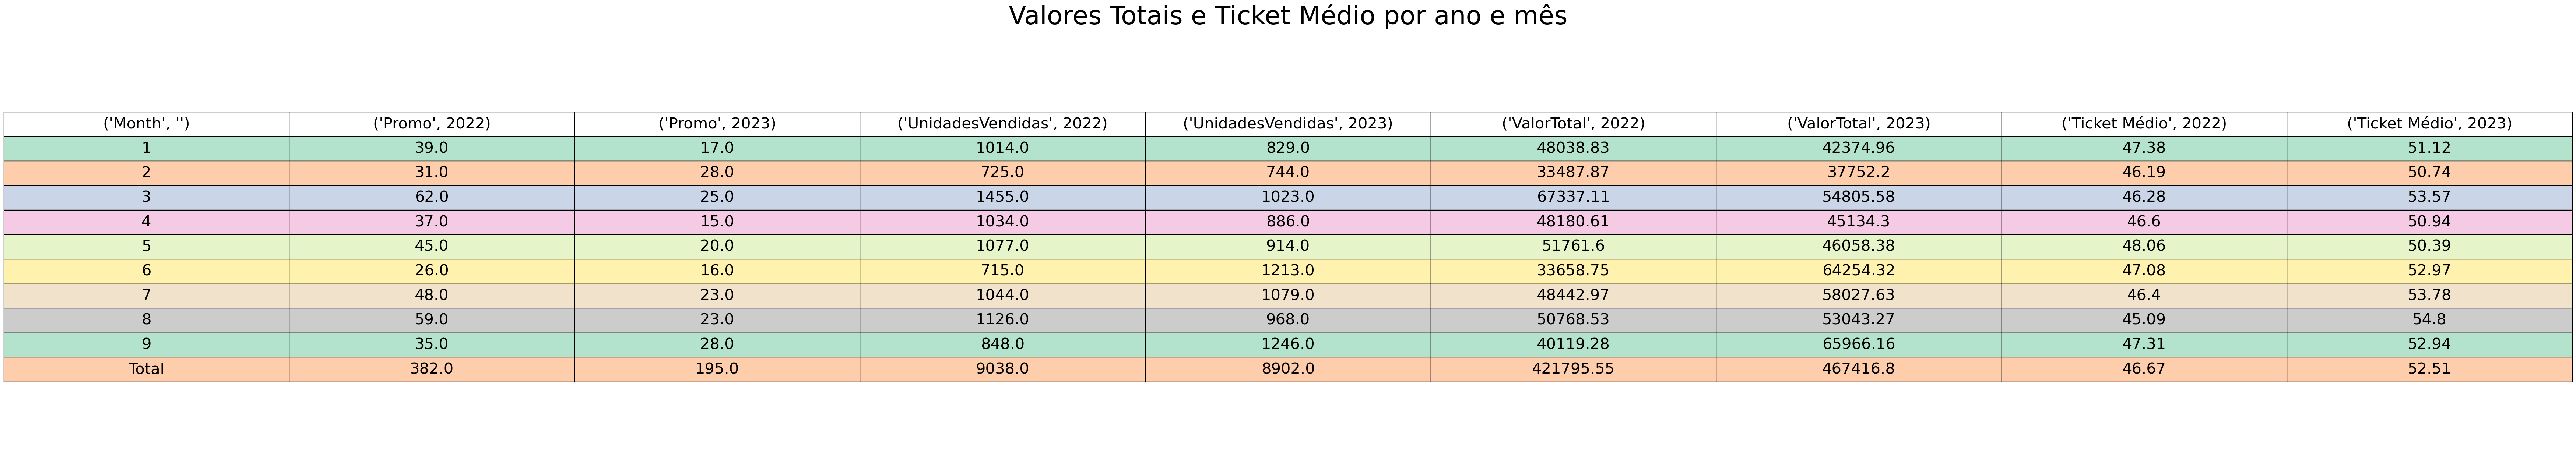

In [23]:
# 'Ticket Médio' para 2022 and 2023
pivot[('Ticket Médio', 2022)] = pivot[('ValorTotal', 2022)] / pivot[('UnidadesVendidas', 2022)]
pivot[('Ticket Médio', 2023)] = pivot[('ValorTotal', 2023)] / pivot[('UnidadesVendidas', 2023)]


# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(20, 15))  # Aumentando a largura da figura

# Add a title to the plot
ax.set_title('Valores Totais e Ticket Médio por ano e mês', fontsize=50, pad=20)

# Adicionando a tabela à figura
table_data = pivot.reset_index().round(2).values.tolist()  # Arredondando os valores para 2 casas decimais
column_labels = pivot.reset_index().columns.tolist()

# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(30)

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(30)

# Ajustando a largura das colunas e a altura das linhas
table.scale(4.5, 4)  # Aumentando a largura das colunas e a altura das linhas

# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('pivot_table_with_ticket_medio.png')

###### - destaque Ticket Médio maior em todos os meses de 2023

___

In [24]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define a list of colors
colors = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']

# Calcular o Ticket Médio
df_t['Ticket Médio'] = df_t['ValorTotal'] / df_t['UnidadesVendidas']

# Agrupar os dados e calcular a média
df_grouped = df_t.groupby(['Year', 'Month']).agg({'UnidadesVendidas': 'sum', 'ValorTotal': 'sum', 'Promo': 'sum', 'Ticket Médio': 'mean'}).reset_index()

# Obter o número de colunas
num_cols = len(df_grouped.columns) - 2  # Subtrair as colunas 'Year' e 'Month'

# Calcular o número de linhas e colunas para os subplots
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

# Criar subplots
fig = make_subplots(rows=num_rows, cols=2, subplot_titles=df_grouped.columns[2:])

# Adicionar traços
for i, header in enumerate(df_grouped.columns[2:]):
    row = i // 2 + 1
    col = i % 2 + 1
    for j, year in enumerate(df_grouped['Year'].unique()):
        df_year = df_grouped[df_grouped['Year'] == year]
        fig.add_trace(go.Scatter(x=df_year['Month'], y=df_year[header], mode='lines', name=f'{header} {year}', line=dict(color=colors[j % len(colors)])), row=row, col=col)

# Atualizar layout
fig.update_layout(height=600, width=800, title_text="Subplots")
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure3.png')

###### - movimentos atípicos de volume de vendas em 2022 em Março e em 2023 em junho e setembro
###### - Ticket Médio é outro destaque em 2023

____________________________________________________________________

___

#### Segunda parte da análise:
- explorando os dados de transações com as Marcas e suas categorias

##### nesta segunda parte da análise é possível verificar que:

###### O top vermelho gammaz - teve ótimo desempenho,
###### - ficou em segundo lugar no rank de Ticket Médio (TM) no ano de 2023. Caiu 1 posição em relação a 2022
###### - se manteve em primeiro em relação a Unidades Vendidas e Valor Total (VT) 2022 e 2023
###### - fez menos promoções em 2023 em relação a 2022 - caiu de sexto em quantidade de promoções para sétimo
###### mas o Botton azul Gammaz também teve destaque!

###### 2023	Bottom Azul Marca GammaZ  ->	TM - 88.517723	 VT - 75759.52
###### 2023	Top Vermelho Marca GammaZ ->	TM - 83.774699	 VT - 146329.22

###### O Botton azul gammaz que não foi vendido em 2022 teve um desempenho melhor em 2023 quando se olha pra Ticket Médio.

###### A Marca Gammaz no geral teve um bom desempenho pra Ticket Médio e Valor Total, ultrapassando em Valor Total a Marca AlfaX
 
###### As promoções não impulsionaram o negócio de forma geral

###### Cores vermelhas são representativas em vendas, mas um destaque foram peças azuis, que melhoraram tanto em quantidade vendida, quanto em aumento de ticket médio e valor Total

###### Houve crescimento de Ticket médio de peças tipo Botton e também Valor Total, o que ajuda a explicar o sucesso do Botton azul gammaz


In [25]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de produto
ws = wb['Produto']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_p = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_p.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_p[col].dtype == 'object':
        # Remova os espaços em branco no início e no final  
        df_p[col] = df_p[col].str.strip()


# Ajuste da coluna 'Descrição Produto'
def update_description(row):
    if row['Categoria'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Categoria'] + ' ' + row['Descrição Produto']
    if row['Cor'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Categoria'], row['Categoria'] + ' ' + row['Cor'])
    if 'Marca' not in row['Descrição Produto'] and row['Marca'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Marca'], 'Marca ' + row['Marca'])
    return row

df_p = df_p.apply(update_description, axis=1)

df_p.loc[df_p['ID_Produto'] == 123010, 'Descrição Produto'] = 'Bottom Azul Marca GammaZ'
df_p.loc[df_p['ID_Produto'] == 123011, 'Descrição Produto'] = 'Bottom Azul Marca BetaY'

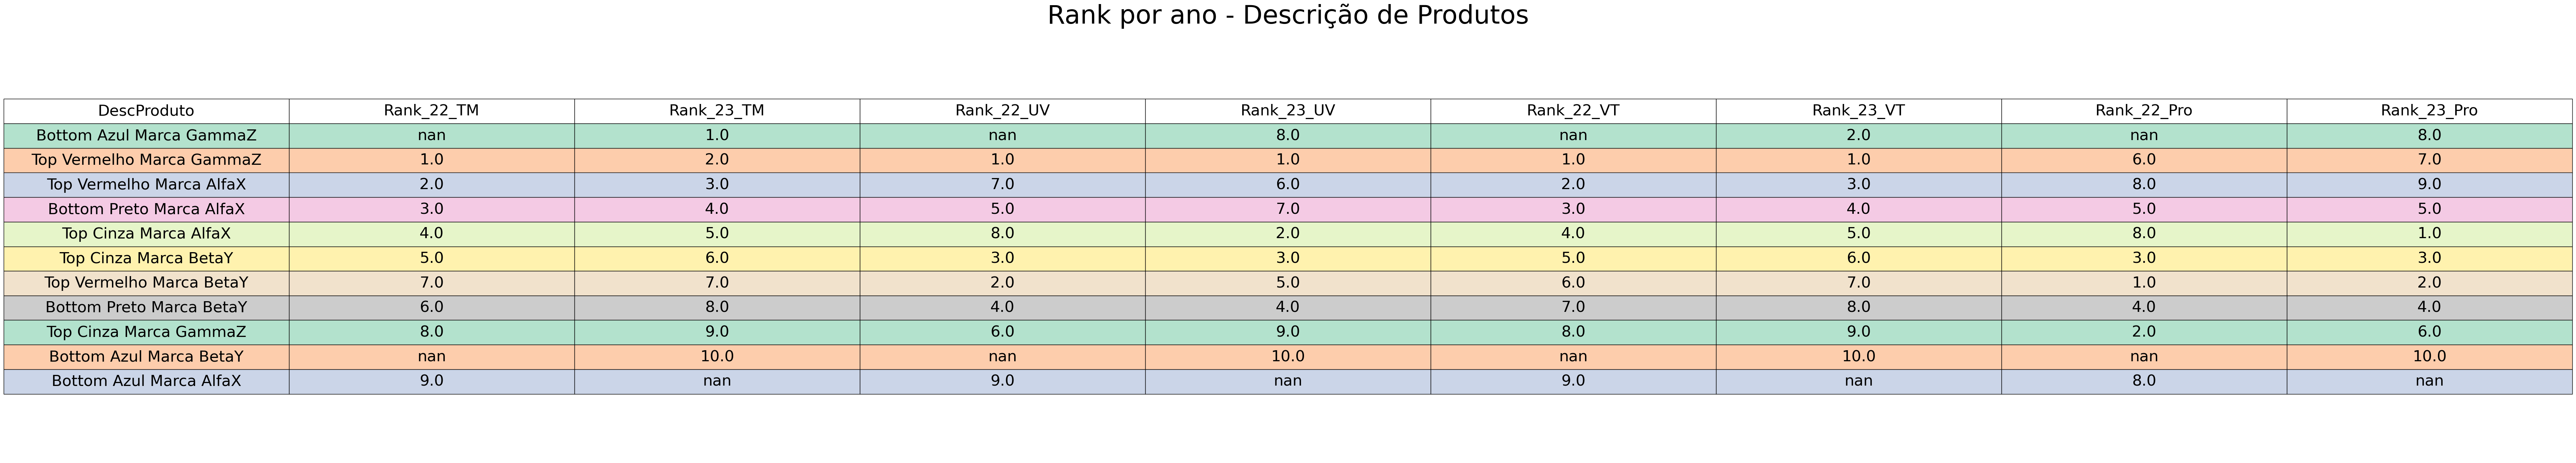

In [26]:
# Ajuste da coluna 'Descrição Produto'
def update_description(row):
    if row['Categoria'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Categoria'] + ' ' + row['Descrição Produto']
    if row['Cor'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Categoria'], row['Categoria'] + ' ' + row['Cor'])
    if 'Marca' not in row['Descrição Produto'] and row['Marca'] not in row['Descrição Produto']:
        row['Descrição Produto'] = row['Descrição Produto'].replace(row['Marca'], 'Marca ' + row['Marca'])
    return row

df_p = df_p.apply(update_description, axis=1)
df_p.loc[df_p['ID_Produto'] == 123010, 'Descrição Produto'] = 'Bottom Azul Marca GammaZ'
df_p.loc[df_p['ID_Produto'] == 123011, 'Descrição Produto'] = 'Bottom Azul Marca BetaY'
df_tp = pd.merge(df_t, df_p, on='ID_Produto', how='left')
del df_t
df_tp_drp = df_tp.drop(columns=['ID_Trans', 'Data', 'ID_Loja', 'ID_Produto', 'ID_Cliente', 'Month'])
grouped_df = df_tp_drp.groupby(['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Year']).agg({'Ticket Médio': 'mean', 'UnidadesVendidas': 'sum', 'ValorTotal': 'sum', 'Promo': 'sum'}).reset_index()

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "UnidadesVendidas" em cada DataFrame
df1['Rank_2022_UnidadesVendidas'] = df1['UnidadesVendidas'].rank(ascending=False)
df2['Rank_2023_UnidadesVendidas'] = df2['UnidadesVendidas'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_UnidadesVendidas = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_UnidadesVendidas']], 
                                 df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_UnidadesVendidas']], 
                                 on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                                 how='outer')

# Classificar o DataFrame por 'Rank_2023_UnidadesVendidas'
rank_UnidadesVendidas = rank_UnidadesVendidas.sort_values('Rank_2023_UnidadesVendidas')

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "ValorTotal" em cada DataFrame
df1['Rank_2022_ValorTotal'] = df1['ValorTotal'].rank(ascending=False)
df2['Rank_2023_ValorTotal'] = df2['ValorTotal'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_ValorTotal = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_ValorTotal']], 
                           df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_ValorTotal']], 
                           on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                           how='outer')

# Classifique o DataFrame por "Rank_2023_ValorTotal
rank_ValorTotal = rank_ValorTotal.sort_values('Rank_2023_ValorTotal')

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "Promo" em cada DataFrame
df1['Rank_2022_Promo'] = df1['Promo'].rank(ascending=False)
df2['Rank_2023_Promo'] = df2['Promo'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_Promo = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_Promo']], 
                      df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_Promo']], 
                      on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                      how='outer')

# Classifique o DataFrame por 'Rank_2023_Promo'
rank_Promo = rank_Promo.sort_values('Rank_2023_Promo')

# Filtrar o DataFrame por ano e criar dois DataFrames separados
df1 = grouped_df[grouped_df['Year'] == 2022].copy()
df2 = grouped_df[grouped_df['Year'] == 2023].copy()

# Criar uma classificação de "Ticket Médio" em cada DataFrame
df1['Rank_2022_Ticket_Medio'] = df1['Ticket Médio'].rank(ascending=False)
df2['Rank_2023_Ticket_Medio'] = df2['Ticket Médio'].rank(ascending=False)

# Mesclar os dois DataFrames usando uma junção externa completa, trazendo apenas as colunas de classificação
rank_Ticket_Medio = pd.merge(df1[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2022_Ticket_Medio']], 
                             df2[['Descrição Produto', 'Categoria', 'Cor', 'Marca', 'Rank_2023_Ticket_Medio']], 
                             on=['Descrição Produto', 'Categoria', 'Cor', 'Marca'], 
                             how='outer')

# Classifique o DataFrame por 'Rank_2023_Ticket_Medio'
rank_Ticket_Medio = rank_Ticket_Medio.sort_values('Rank_2023_Ticket_Medio')

# Eliminar as colunas "Categoria" e "Marca
rank_UnidadesVendidas = rank_UnidadesVendidas.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_ValorTotal = rank_ValorTotal.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_Promo = rank_Promo.drop(['Categoria', 'Marca','Cor'], axis=1)
rank_Ticket_Medio = rank_Ticket_Medio.drop(['Categoria', 'Marca','Cor'], axis=1)

# Merge
merged_df = rank_UnidadesVendidas.merge(rank_ValorTotal, how='outer', on=['Descrição Produto'])
merged_df = merged_df.merge(rank_Promo, how='outer', on=['Descrição Produto'])
merged_df = merged_df.merge(rank_Ticket_Medio, how='outer', on=['Descrição Produto'])

# Ordenar por 'Rank_2023_Ticket_Medio'
merged_df = merged_df.sort_values(by='Rank_2023_Ticket_Medio')

cols = ['Descrição Produto', 'Rank_2022_Ticket_Medio', 'Rank_2023_Ticket_Medio'] + [col for col in merged_df.columns if col not in ['Descrição Produto', 'Rank_2022_Ticket_Medio', 'Rank_2023_Ticket_Medio']]
merged_df = merged_df[cols]

# Definir um dicionário para os nomes das novas colunas
new_column_names = {
    'Rank_2022_Ticket_Medio': 'Rank_22_TM',
    'Rank_2023_Ticket_Medio': 'Rank_23_TM',
    'Rank_2022_UnidadesVendidas': 'Rank_22_UV',
    'Rank_2023_UnidadesVendidas': 'Rank_23_UV',
    'Rank_2022_ValorTotal': 'Rank_22_VT',
    'Rank_2023_ValorTotal': 'Rank_23_VT',
    'Rank_2022_Promo': 'Rank_22_Pro',
    'Rank_2023_Promo': 'Rank_23_Pro',
    'Descrição Produto': 'DescProduto'
}

# Renomear as colunas
merged_df.rename(columns=new_column_names, inplace=True)

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(20, 15))

# Add a title to the plot
ax.set_title('Rank por ano - Descrição de Produtos', fontsize=50, pad=20)

# Adicionando a tabela à figura
# Reset the index and drop the old index
table_data = merged_df.reset_index(drop=True).round(2).values.tolist()
column_labels = merged_df.reset_index(drop=True).columns.tolist()


# Definindo as cores
colors = sns.color_palette("Pastel2").as_hex()

# Criando uma matriz de cores
cell_colors = [[colors[i%len(colors)] for _ in row] for i, row in enumerate(table_data)]

# Adicionando a tabela à figura
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc = 'center', loc='center', cellColours=cell_colors)

# Ajustando o tamanho da fonte
table.auto_set_font_size(False)
table.set_fontsize(30)

# Aumentando a largura e altura geral da tabela
table.scale(4.5, 4)  # Aumente o primeiro valor para aumentar a largura, e o segundo valor para aumentar a altura

# Aumentando o tamanho da fonte
table.set_fontsize(30)

# Ajustando o tamanho da fonte dos cabeçalhos
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(30)

# Ajustando o tamanho da fonte da coluna 'DescProduto'
for key, cell in table.get_celld().items():
    if key[1] == 0:  # 0 é o índice da coluna 'DescProduto'
        cell.set_fontsize(30)  # Aumente este valor para tornar o texto maior
# Escondendo os eixos
ax.axis('off')

# Salvando a figura como .png
plt.savefig('merged_df_table.png')

###### - top 3 são destaques em Ticket Médio e Faturamento

___

In [27]:
# Criar DataFrame com colunas que contenham "2022"
df_2022 = merged_df.filter(regex='DesProduto|2022')
# Criar DataFrame com colunas que contenham "2023"
df_2023 = merged_df.filter(regex='DesProduto|2023')
# Agrupa por "Ano" e "Marca" e calcule a soma do "ValorTotal" e a média do "Ticket Médio".
df_Marca = df_tp.groupby(['Year', 'Marca']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()
# Agrupa por "Ano" e "Marca" e calcule a soma do "ValorTotal" e a média do "Ticket Médio".
df_Marca_ = df_tp.groupby(['Year', 'Marca']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crie um subplot com 1 linha e 2 colunas, com títulos para espaçamento
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

# Defina cores para cada ano
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

# Obtenha os anos únicos
years = df_Marca['Year'].unique()

# Para cada ano
for i, year in enumerate(years):
    # Filtra o DataFrame para o ano atual
    df_year = df_Marca[df_Marca['Year'] == year]

    # Crie um gráfico de barras para 'Ticket Médio'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    # Crie um gráfico de barras para 'ValorTotal'
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

# Atualize as propriedades do eixo x e y
fig.update_xaxes(title_text="Marca", row=1, col=1)
fig.update_xaxes(title_text="Marca", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

# Atualize o layout para agrupar barras em vez de empilhar, aumentar a largura da figura e ajustar o espaçamento do subplot
fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

# Mostre a figura
fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure4.png')

###### - GammaZ ultrapassa AlfaX em faturamento em 2023

___

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))


colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}


years = df_Marca_['Year'].unique()


for i, year in enumerate(years):
    
    df_year = df_Marca_[df_Marca_['Year'] == year]

    
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    
    fig.add_trace(go.Bar(x=df_year['Marca'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)


fig.update_xaxes(title_text="Marca", row=1, col=1)
fig.update_xaxes(title_text="Marca", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)


fig.update_layout(barmode='group', width=1200, margin=dict(b=100))


fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure5.png')

###### - GammaZ ultrapassa AlfaX em vendas em 2023

___

In [30]:
df_Cor = df_tp.groupby(['Year', 'Cor']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

df_Cor_ = df_tp.groupby(['Year', 'Cor']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()

import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))


colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}


years = df_Cor['Year'].unique()


for i, year in enumerate(years):
    
    df_year = df_Cor[df_Cor['Year'] == year]

   
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)


fig.update_xaxes(title_text="Cor", row=1, col=1)
fig.update_xaxes(title_text="Cor", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)


fig.update_layout(barmode='group', width=1200, margin=dict(b=100))


fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure6.png')

###### - vermelho é sempre destaque
###### - Azul tem desempenho muito forte em 2023, se recuperando em faturamento, mas principalemnte em Ticket Médio

___

In [31]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Cor_['Year'].unique()


for i, year in enumerate(years):
    
    df_year = df_Cor_[df_Cor_['Year'] == year]
    
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)
    
    fig.add_trace(go.Bar(x=df_year['Cor'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Cor", row=1, col=1)
fig.update_xaxes(title_text="Cor", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

fig.show()
# Save the figure as a .png file
pio.write_image(fig, 'figure7.png')

###### - vermelho é sempre destaque em vendas
###### - Azul tem promoções em 2023

___

In [32]:
df_Categoria = df_tp.groupby(['Year', 'Categoria']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()

df_Categoria_ = df_tp.groupby(['Year', 'Categoria']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Categoria['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Categoria[df_Categoria['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Categoria", row=1, col=1)
fig.update_xaxes(title_text="Categoria", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure8.png')

###### - Top fatura mais, mas Bottom melhora Ticket médio em 2023

___

In [33]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Categoria_['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Categoria_[df_Categoria_['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)
    fig.add_trace(go.Bar(x=df_year['Categoria'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Categoria", row=1, col=1)
fig.update_xaxes(title_text="Categoria", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure9.png')

In [34]:
df_Descrição_Produto = df_tp.groupby(['Year', 'Descrição Produto']).agg({'ValorTotal': 'sum', 'Ticket Médio': 'mean'}).reset_index()
df_Descrição_Produto_ = df_tp.groupby(['Year', 'Descrição Produto']).agg({'Promo': 'sum', 'UnidadesVendidas': 'sum'}).reset_index()

In [35]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))
colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Descrição_Produto['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Descrição_Produto[df_Descrição_Produto['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['Ticket Médio'], name='Ticket Médio ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)

    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['ValorTotal'], name='ValorTotal ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Descrição Produto", row=1, col=1)
fig.update_xaxes(title_text="Descrição Produto", row=1, col=2)
fig.update_yaxes(title_text="Ticket Médio", row=1, col=1)
fig.update_yaxes(title_text="ValorTotal", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

fig.show()


# Save the figure as a .png file
pio.write_image(fig, 'figure10.png')

###### - Ticket Médio e faturamento - destaques Top Vermelho e Bottom Azul GammaZ

___

In [36]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("",""))

colors = {'2022': ['rgb(179,226,205)', 'rgb(253,205,172)'], '2023': ['rgb(102,194,165)', 'rgb(252,141,98)']}

years = df_Descrição_Produto_['Year'].unique()

for i, year in enumerate(years):
    df_year = df_Descrição_Produto_[df_Descrição_Produto_['Year'] == year]

    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['Promo'], name='Promo ' + str(year), marker_color=colors[str(year)][0]), row=1, col=1)
    fig.add_trace(go.Bar(x=df_year['Descrição Produto'], y=df_year['UnidadesVendidas'], name='UnidadesVendidas ' + str(year), marker_color=colors[str(year)][1]), row=1, col=2)

fig.update_xaxes(title_text="Descrição Produto", row=1, col=1)
fig.update_xaxes(title_text="Descrição Produto", row=1, col=2)
fig.update_yaxes(title_text="Promo", row=1, col=1)
fig.update_yaxes(title_text="UnidadesVendidas", row=1, col=2)

fig.update_layout(barmode='group', width=1200, margin=dict(b=100))

fig.show()


# Save the figure as a .png file
pio.write_image(fig, 'figure11.png')

___

In [37]:
def create_plot_for_brand(brand):
    # Obter produtos e anos exclusivos para a marca
    products = df_tp[df_tp['Marca'] == brand]['Descrição Produto'].unique()
    years = sorted(df_tp[df_tp['Marca'] == brand]['Year'].unique())

    # color sequence
    colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']

    # dicionário para mapear anos a cores
    year_color = {year: colors[i % len(colors)] for i, year in enumerate(years)}

    # dicionários para armazenar a média de "Ticket Médio" e somar "UnidadesVendidas", "ValorTotal" e "Promo" para cada produto e ano
    ticket_medio_means = {year: {} for year in years}
    unidades_vendidas_sums = {year: {} for year in years}
    valor_total_sums = {year: {} for year in years}
    promo_sums = {year: {} for year in years}

    fig = go.Figure()
    for year in years:
        for product in products:
            # Filtrar DataFrame por produto e ano
            df_product_year = df_tp[(df_tp['Marca'] == brand) & (df_tp['Descrição Produto'] == product) & (df_tp['Year'] == year)]

            # média de "Ticket Médio" e a soma de "UnidadesVendidas", "ValorTotal" e "Promo".
            ticket_medio_mean = df_product_year['Ticket Médio'].mean()
            unidades_vendidas_sum = df_product_year['UnidadesVendidas'].sum()
            valor_total_sum = df_product_year['ValorTotal'].sum()
            promo_sum = df_product_year['Promo'].sum()

            # Armazena esses valores nos dicionários
            ticket_medio_means[year][product] = ticket_medio_mean
            unidades_vendidas_sums[year][product] = unidades_vendidas_sum
            valor_total_sums[year][product] = valor_total_sum
            promo_sums[year][product] = promo_sum

        # Adicionar uma barra ou linha ao gráfico, dependendo do ano
        if year == 2022:
            fig.add_trace(go.Bar(x=products, y=[ticket_medio_means[year][product] for product in products], name=f'{year}', marker_color=year_color[year],
                                 hovertemplate='Ticket Médio: %{y:.2f}<br>Unidades Vendidas: %{customdata[0]:.2f}<br>Valor Total: %{customdata[1]:.2f}<br>Promo: %{customdata[2]:.2f}<extra></extra>',
                                 customdata=[[unidades_vendidas_sums[year][product], valor_total_sums[year][product], promo_sums[year][product]] for product in products]))
        elif year == 2023:
            # Calcule a variação percentual de 2022 a 2023 para cada produto
            percent_variations = [(ticket_medio_means[year][product] / ticket_medio_means[2022][product] - 1) * 100 for product in products]

            fig.add_trace(go.Scatter(x=products, y=[ticket_medio_means[year][product] for product in products], mode='lines', name=f'{year}', line=dict(color=year_color[year]),
                                     hovertemplate='Ticket Médio: %{y:.2f}<br>Variation from 2022: %{customdata[0]:.2f}%<br>Unidades Vendidas: %{customdata[1]:.2f}<br>Valor Total: %{customdata[2]:.2f}<br>Promo: %{customdata[3]:.2f}<extra></extra>',
                                     customdata=[[percent_variations[i], unidades_vendidas_sums[year][product], valor_total_sums[year][product], promo_sums[year][product]] for i, product in enumerate(products)]))

    # layout
    fig.update_layout(
        height=600, 
        width=900, 
        title_text=f"Ticket Médio for {brand}", 
        xaxis_title="Descrição Produto", 
        yaxis_title="Ticket Médio", 
        barmode='group',
        xaxis_tickangle=-90
    )

  
    fig.show()
    


brands = df_tp['Marca'].unique()

for brand in brands:
    create_plot_for_brand(brand)

# Save the figure as a .png file
pio.write_image(fig, 'figure12.png')

___

In [38]:
# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_tp':
        del variables[var_name]

##### Terceira parte da análise:
- Clientes e Lojas

###### nesta terceira parte da análise é possível verificar que:

- As lojas 5 (SP), 8 (RS) e 2 (MG) foram as que melhor performaram em relação a Ticket Médio no ano de 2023
- Para estas lojas a Classe B é a com maior Ticket Médio no ano de 2023 e o sexo feminino se destaca neste quesito
- nas faixas etárias há um diferença entre as lojas quando se trata de Ticket Médio no ano de 2023
- - loja 5 -> 18-25
- - loja 8 -> 25-35
- - loja 2 -> 45+
- as tabelas trazem detalhes que podem auxiliar em decisões futuras de MKT de froma mais detalhada
- A primeira loja da tabela é a primeira do Rank (ordenado por Ticket Médio 2023); e assim por diante

In [39]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Cliente']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_c = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_c.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_c[col]):
        # Remova os espaços em branco no início e no final
        df_c[col] = df_c[col].str.strip()

In [40]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Lojas']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_l = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_l.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_l[col]):
        # Remova os espaços em branco no início e no final
        df_l[col] = df_l[col].str.strip()

In [41]:
# If 'Regiao' is None and 'UF' is 'SP', set 'Regiao' to 'SUDESTE'
df_l.loc[(df_l['Regiao'].isnull()) & (df_l['UF'] == 'SP'), 'Regiao'] = 'SUDESTE'
# If 'Regiao' is None and 'UF' is 'BH', set 'Regiao' to 'SUDESTE'
df_l.loc[(df_l['Regiao'].isnull()) & (df_l['UF'] == 'BH'), 'Regiao'] = 'SUDESTE'
df_merged = df_tp.merge(df_l, on='ID_Loja', how='left')
df_final = df_merged.merge(df_c, left_on='ID_Cliente', right_on='CustomerID', how='left')

# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_final':
        del variables[var_name]

Ticket Médio por ID_Loja e Ano - a barra em vermelho indica a Loja 5 com melhor Ticket Médio agregado no ano 2023 (agregado de todos os produtos)

In [45]:
# Group by 'ID_Loja' and 'Year' and calculate the mean of 'Ticket Médio', 'ValorTotal', and 'UnidadesVendidas'
df_grouped = df_final.groupby(['ID_Loja', 'Year']).agg({'Ticket Médio': 'mean', 'ValorTotal': 'sum', 'UnidadesVendidas': 'sum'})

# Rank 'ID_Loja' by 'Ticket Médio', 'ValorTotal', and 'UnidadesVendidas' for each year
df_grouped['Rank_Ticket_Medio'] = df_grouped.groupby('Year')['Ticket Médio'].rank(ascending=False)
df_grouped['Rank_ValorTotal'] = df_grouped.groupby('Year')['ValorTotal'].rank(ascending=False)
df_grouped['Rank_UnidadesVendidas'] = df_grouped.groupby('Year')['UnidadesVendidas'].rank(ascending=False)
# Sort df_grouped by 'ID_Loja', 'Year' and 'Rank_Ticket_Medio'
df_sorted = df_grouped.sort_values(by=['ID_Loja', 'Rank_Ticket_Medio', 'Year'])


import plotly.graph_objects as go

# Reset the index
df_sorted_reset = df_sorted.reset_index()

# Create a color sequence similar to 'Pastel2'
color_sequence = ['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae']

# Get the 'ID_Loja' with the best rank in 2023
best_rank_id_loja_2023 = df_sorted_reset[(df_sorted_reset['Year'] == 2023) & (df_sorted_reset['Rank_Ticket_Medio'] == df_sorted_reset['Rank_Ticket_Medio'].min())]['ID_Loja'].values[0]

# Create a bar plot
fig = go.Figure()

for i, year in enumerate(df_sorted_reset['Year'].unique()):
    df_year = df_sorted_reset[df_sorted_reset['Year'] == year]
    fig.add_trace(go.Bar(
        x=df_year['ID_Loja'],
        y=df_year['Ticket Médio'],
        name=str(year),
        text=df_year['Rank_Ticket_Medio'],
        legendgroup=str(year),
        marker_color=[color_sequence[i % len(color_sequence)] if id_loja != best_rank_id_loja_2023 or year != 2023 else '#0000ff' for id_loja in df_year['ID_Loja']],  # Highlight the best rank in 2023
        hovertemplate='ID_Loja: %{x}<br>Ticket Médio: %{y}<br>Year: '+str(year)+'<br>Rank: %{text}<extra></extra>',
    ))

# Add title and set barmode to 'group'
fig.update_layout(title_text='Ticket Médio por ID_Loja e Ano', barmode='group')

# Show the plot
fig.show()

# Save the figure as a .png file
pio.write_image(fig, 'figure14.png')


___

In [46]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','Marca']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'Marca'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')
#df_pivot_reindexed

- Loja e Marca - Rank por Ticket médio 2023

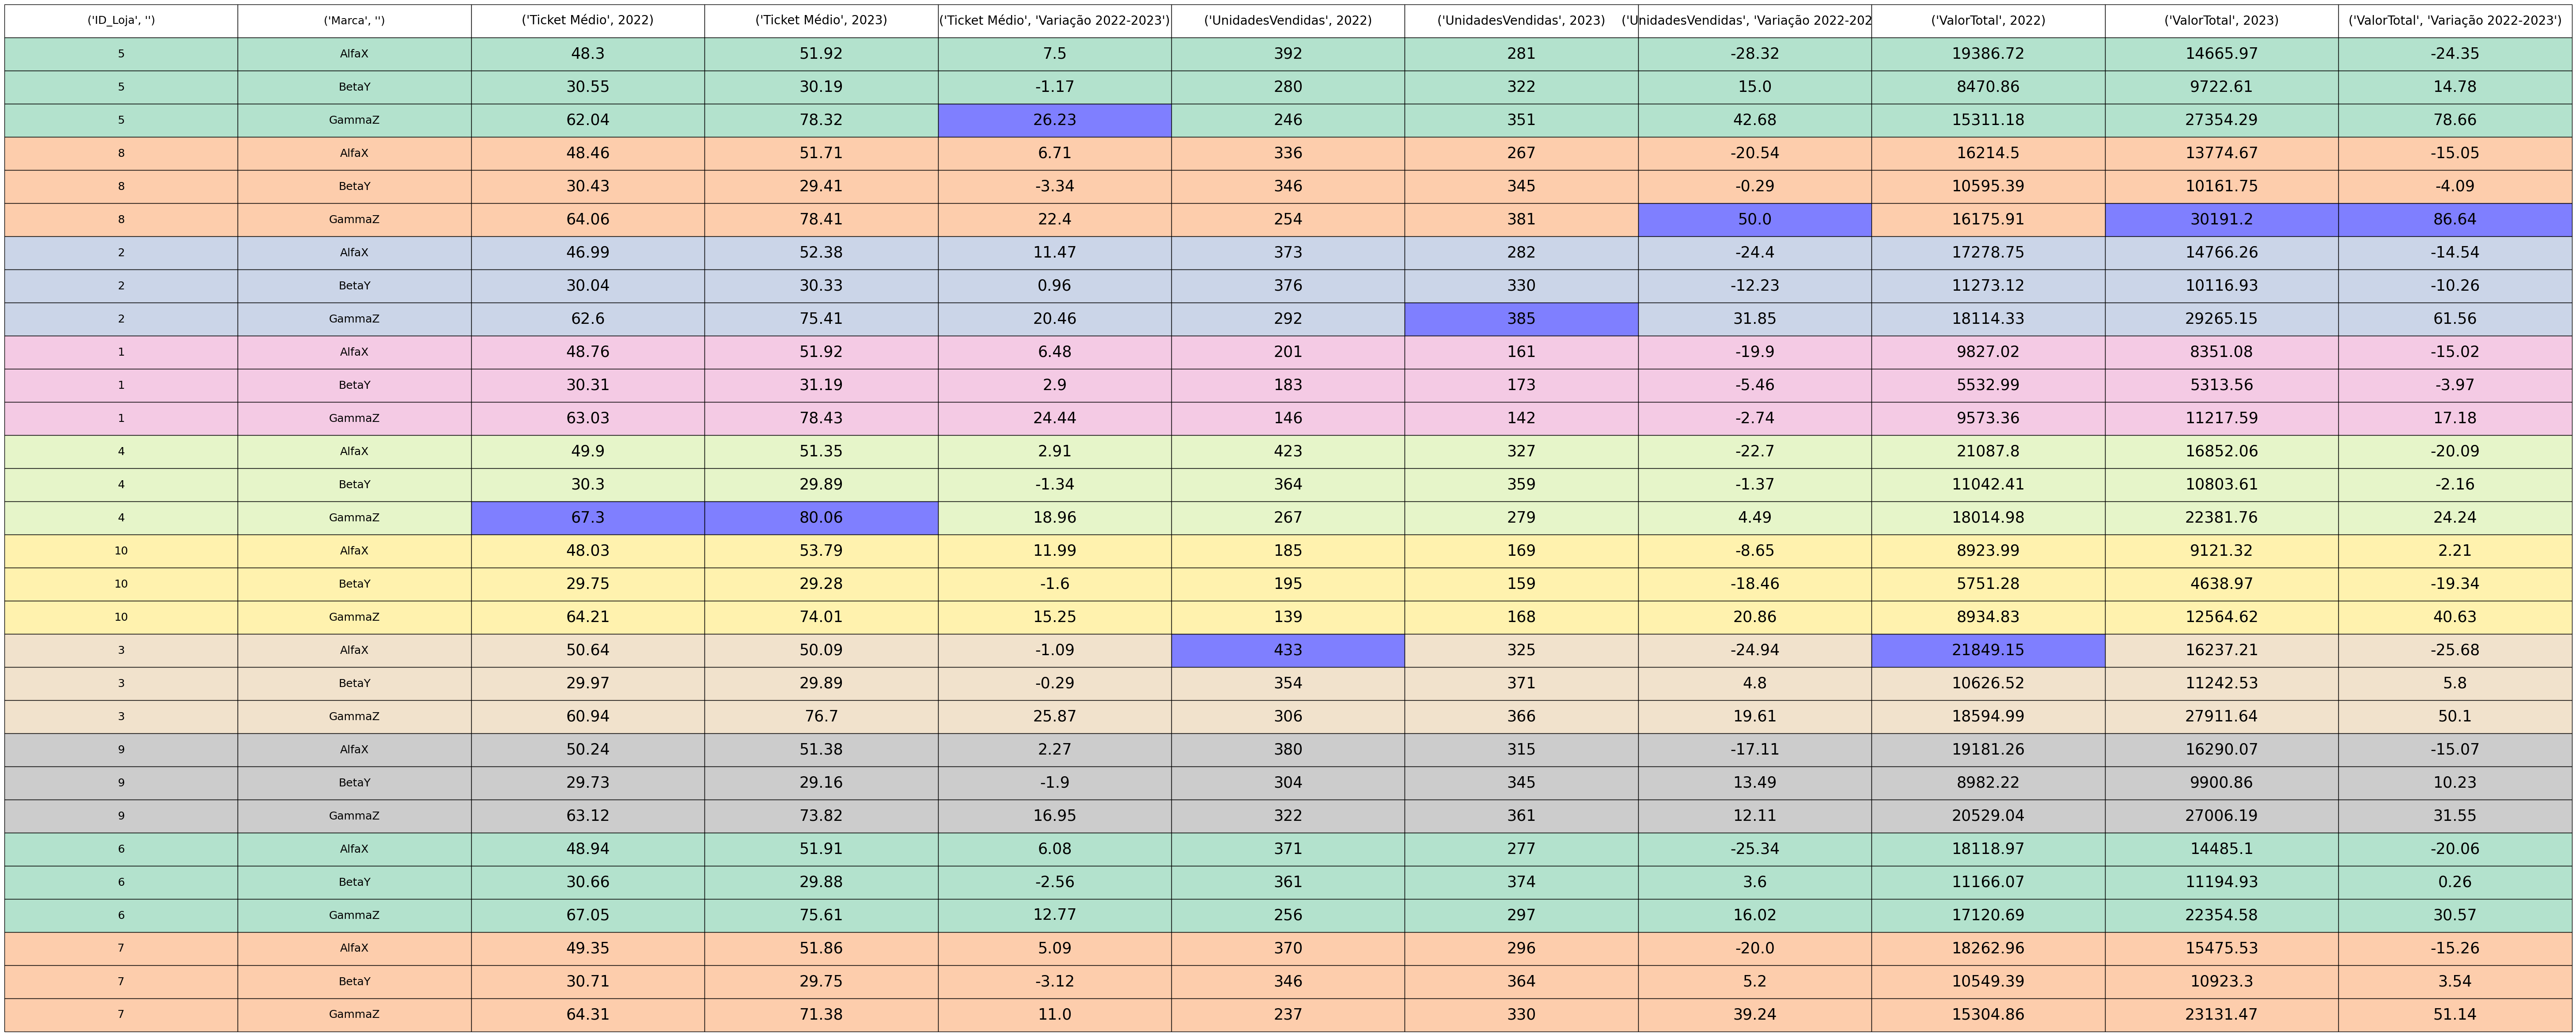

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define the colors
cmap = cm.get_cmap('Pastel2')  # Get the 'Pastel2' colormap
colors = [cmap(i) for i in range(cmap.N)]  # Generate colors from the colormap


# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = (0, 0, 1, 0.5)  # Semi-transparent blue

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'Marca' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')

___

- Loja e UF - Rank por Ticket médio 2023

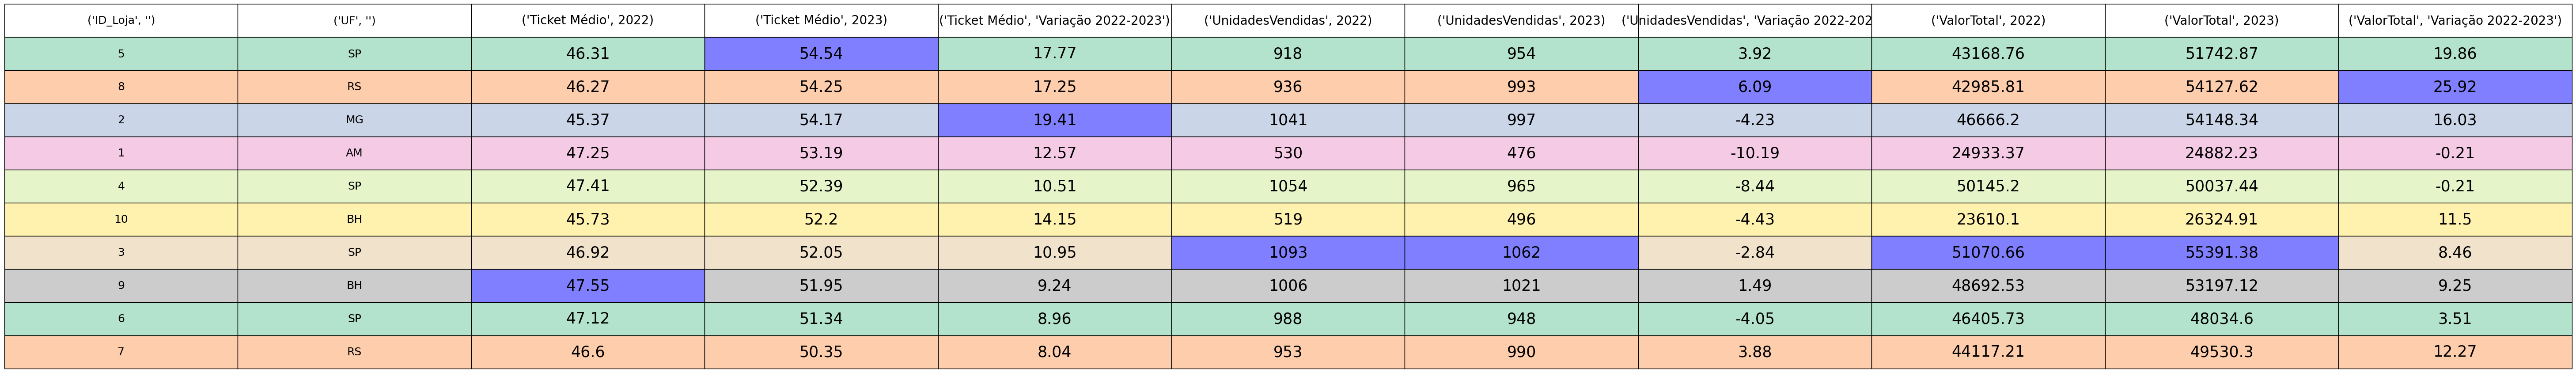

In [51]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','UF']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'UF'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = (0, 0, 1, 0.5)  # Semi-transparent blue

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'UF' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



___

- Loja e Classe Social - Rank por Ticket médio 2023

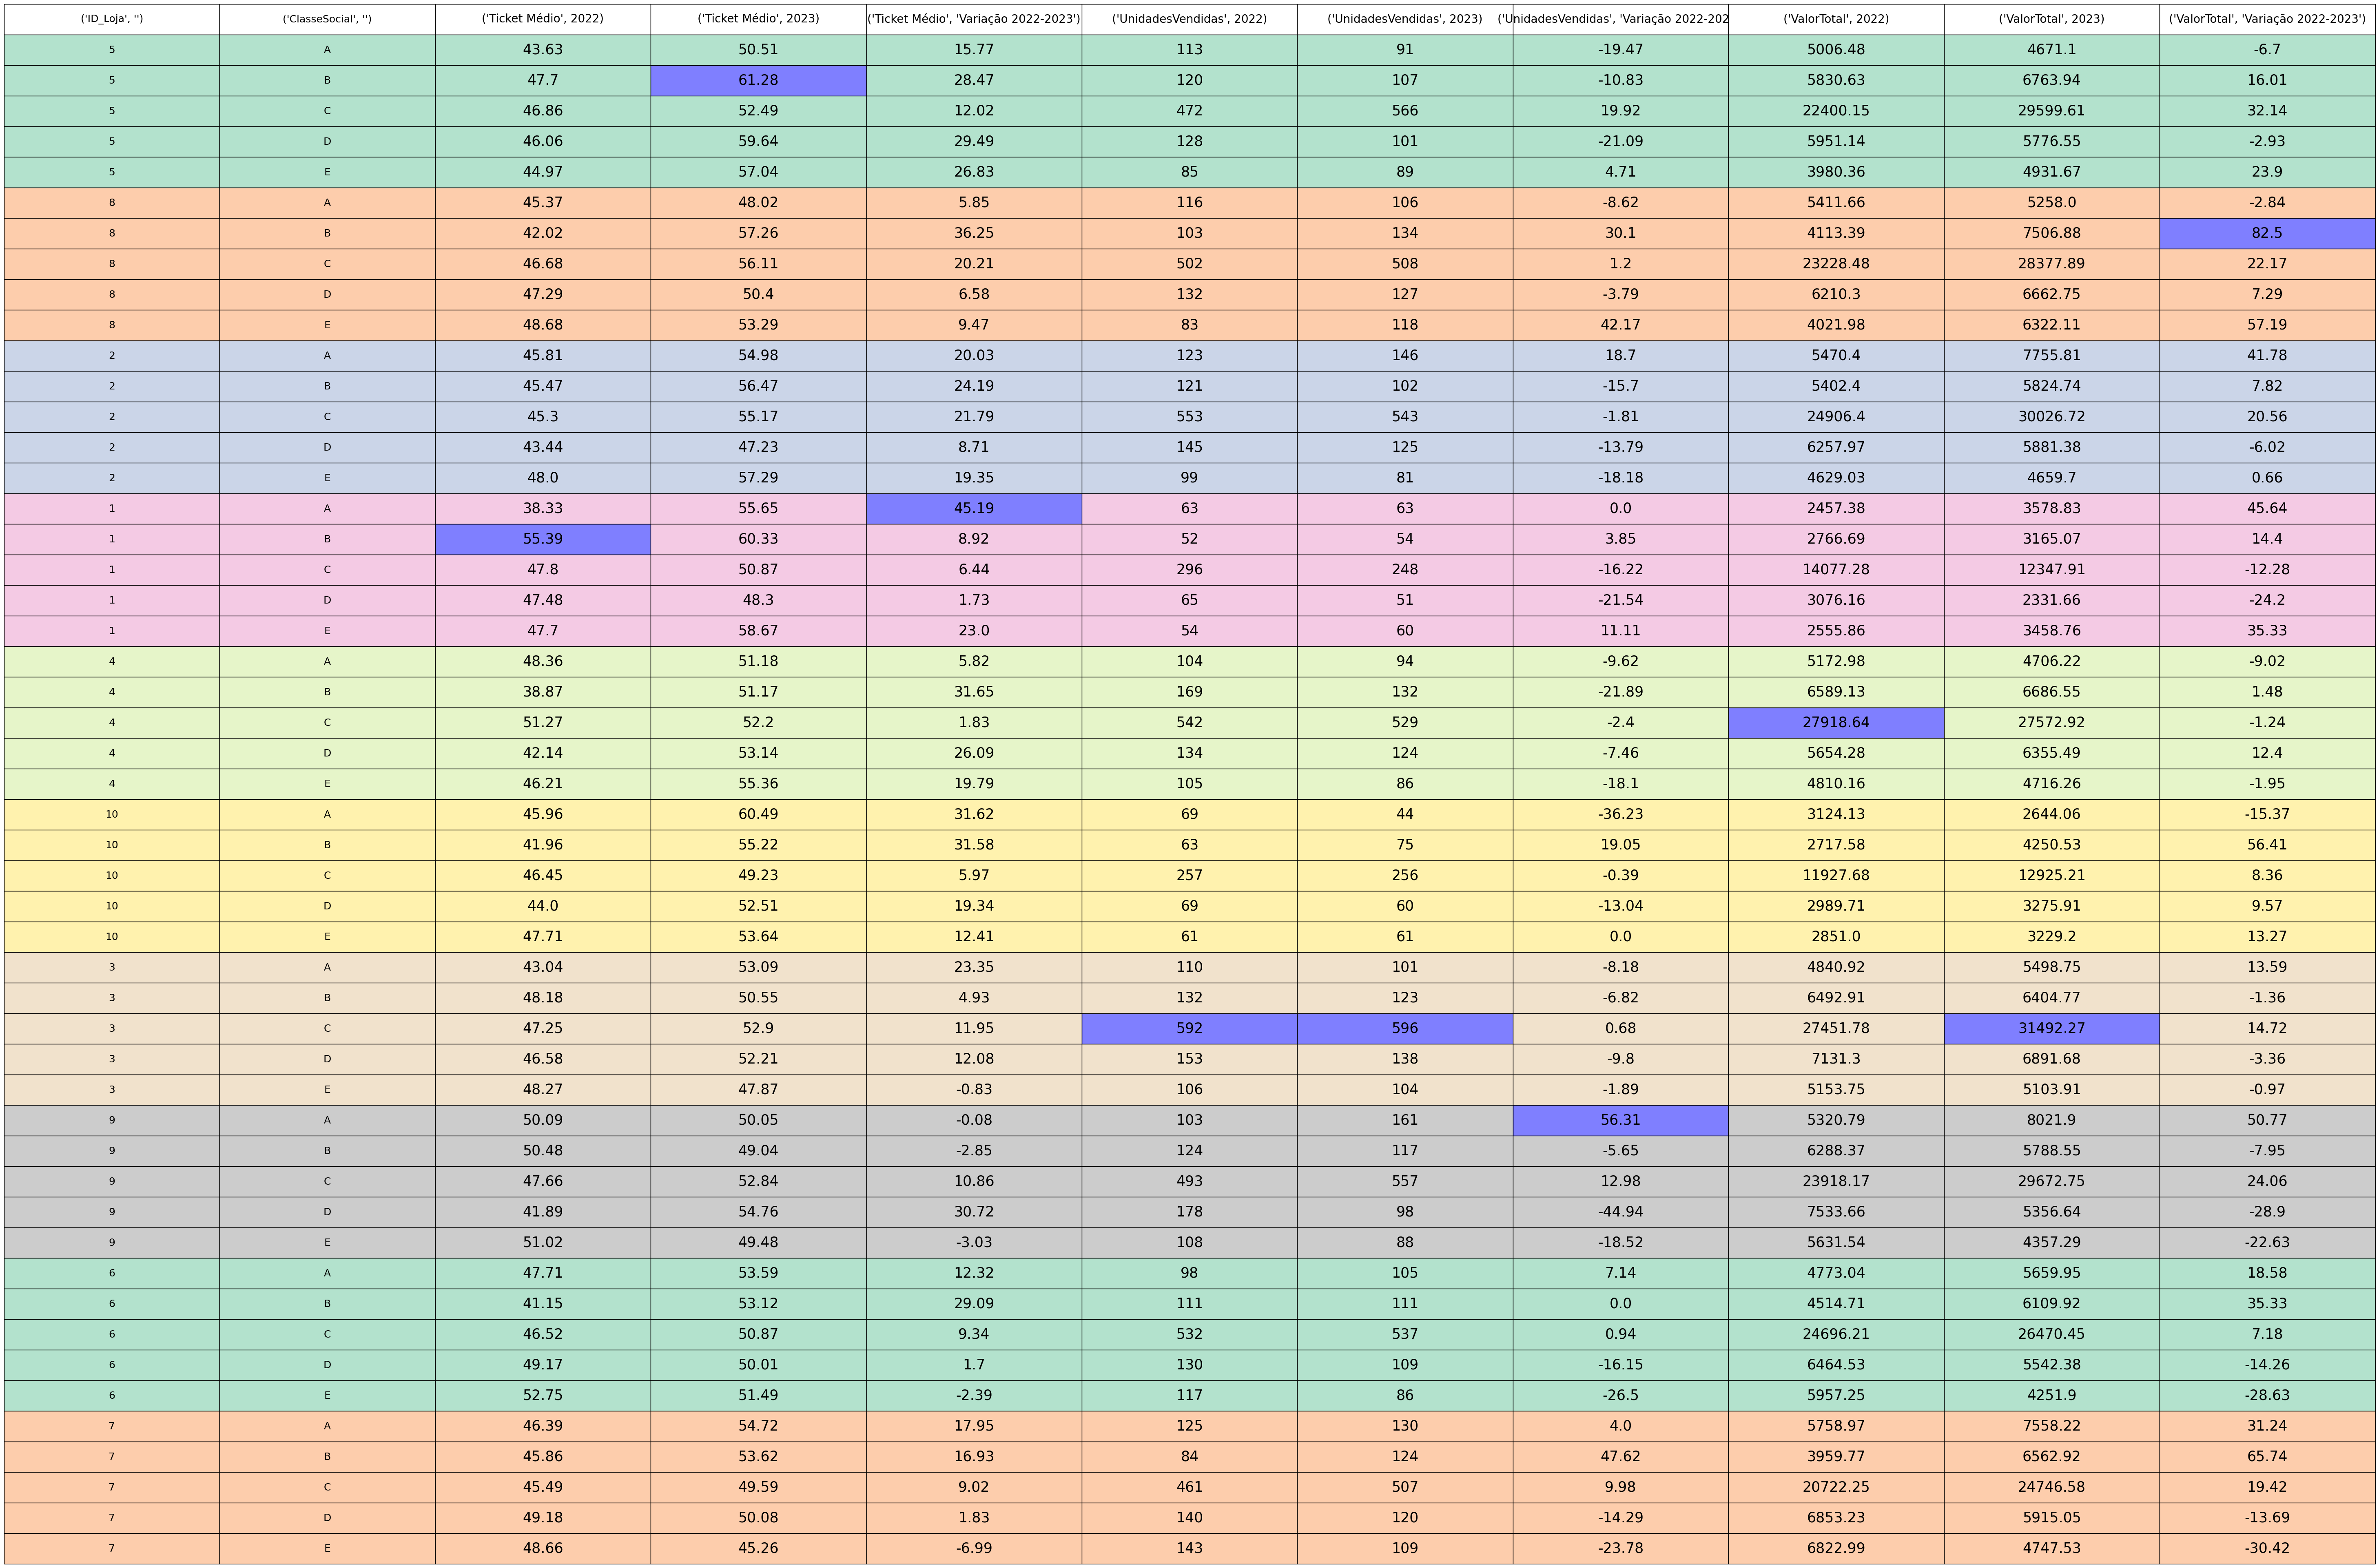

In [52]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','ClasseSocial']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'ClasseSocial'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = (0, 0, 1, 0.5)  # Semi-transparent blue

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'ClasseSocial' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



___

- Loja e Genero - Rank por Ticket médio 2023

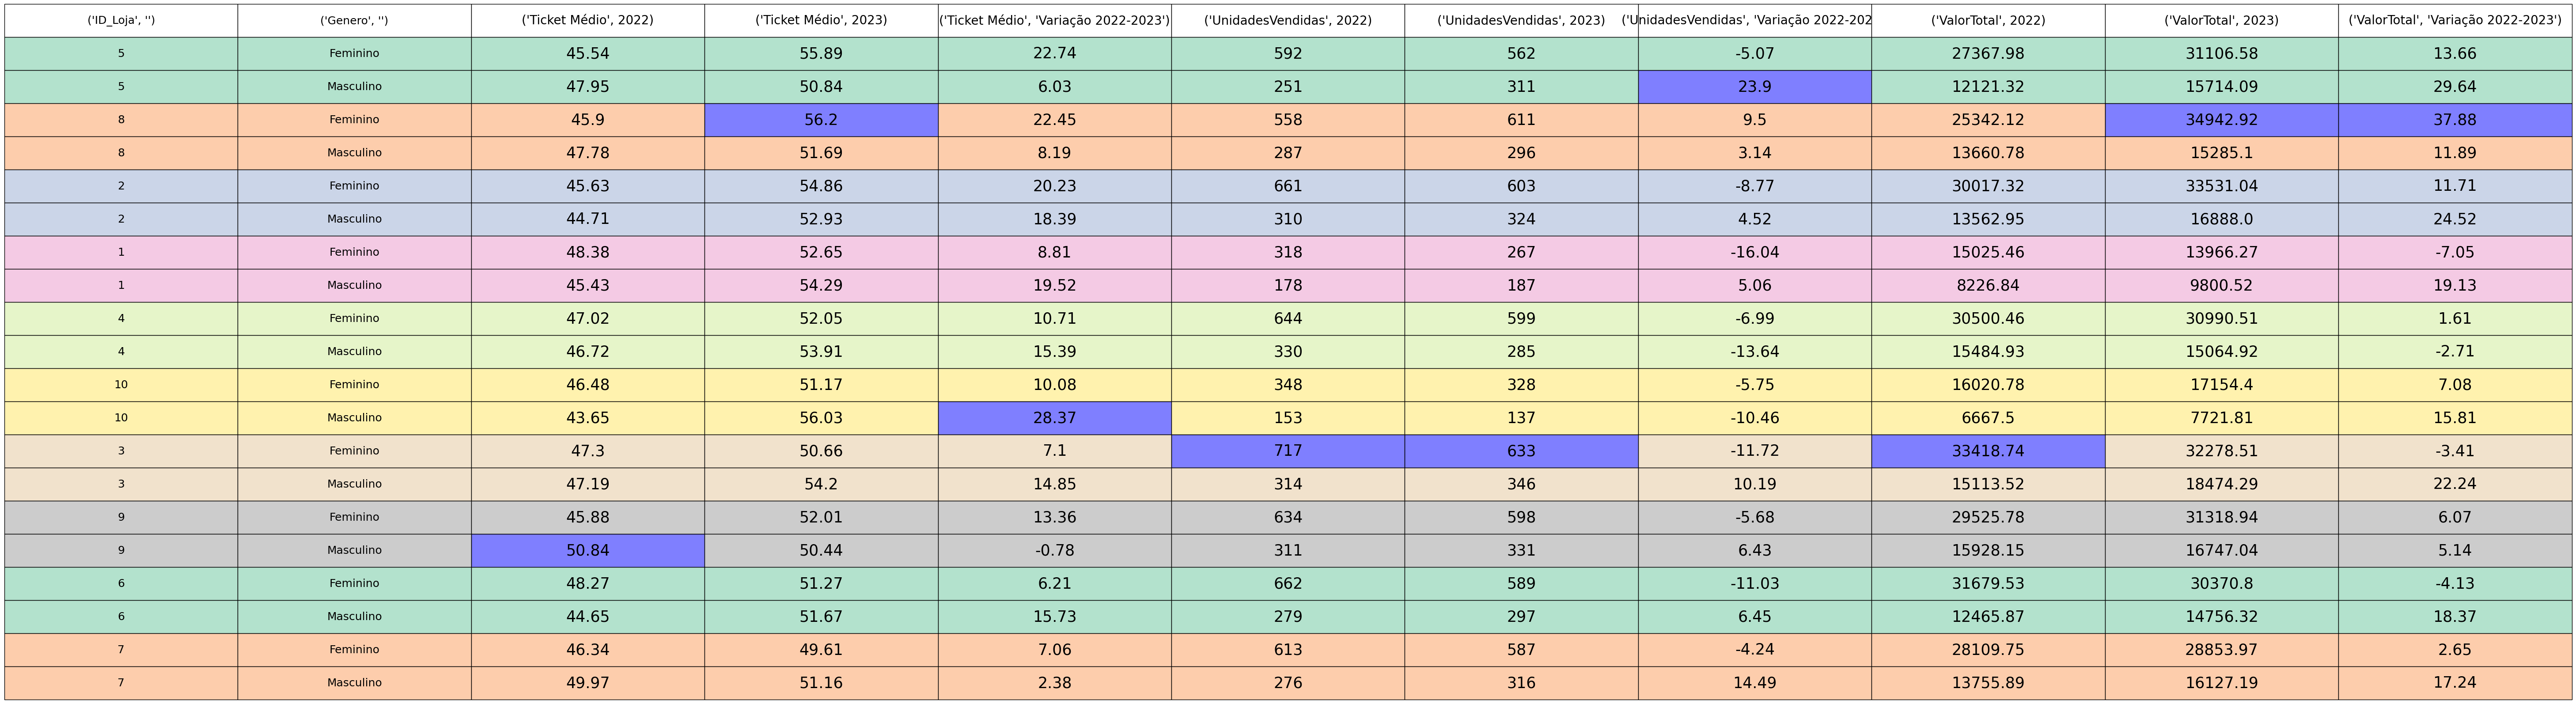

In [53]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','Genero']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'Genero'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = (0, 0, 1, 0.5)  # Semi-transparent blue

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'Genero' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



___

- Loja e Faixa de Idade - Rank por Ticket médio 2023

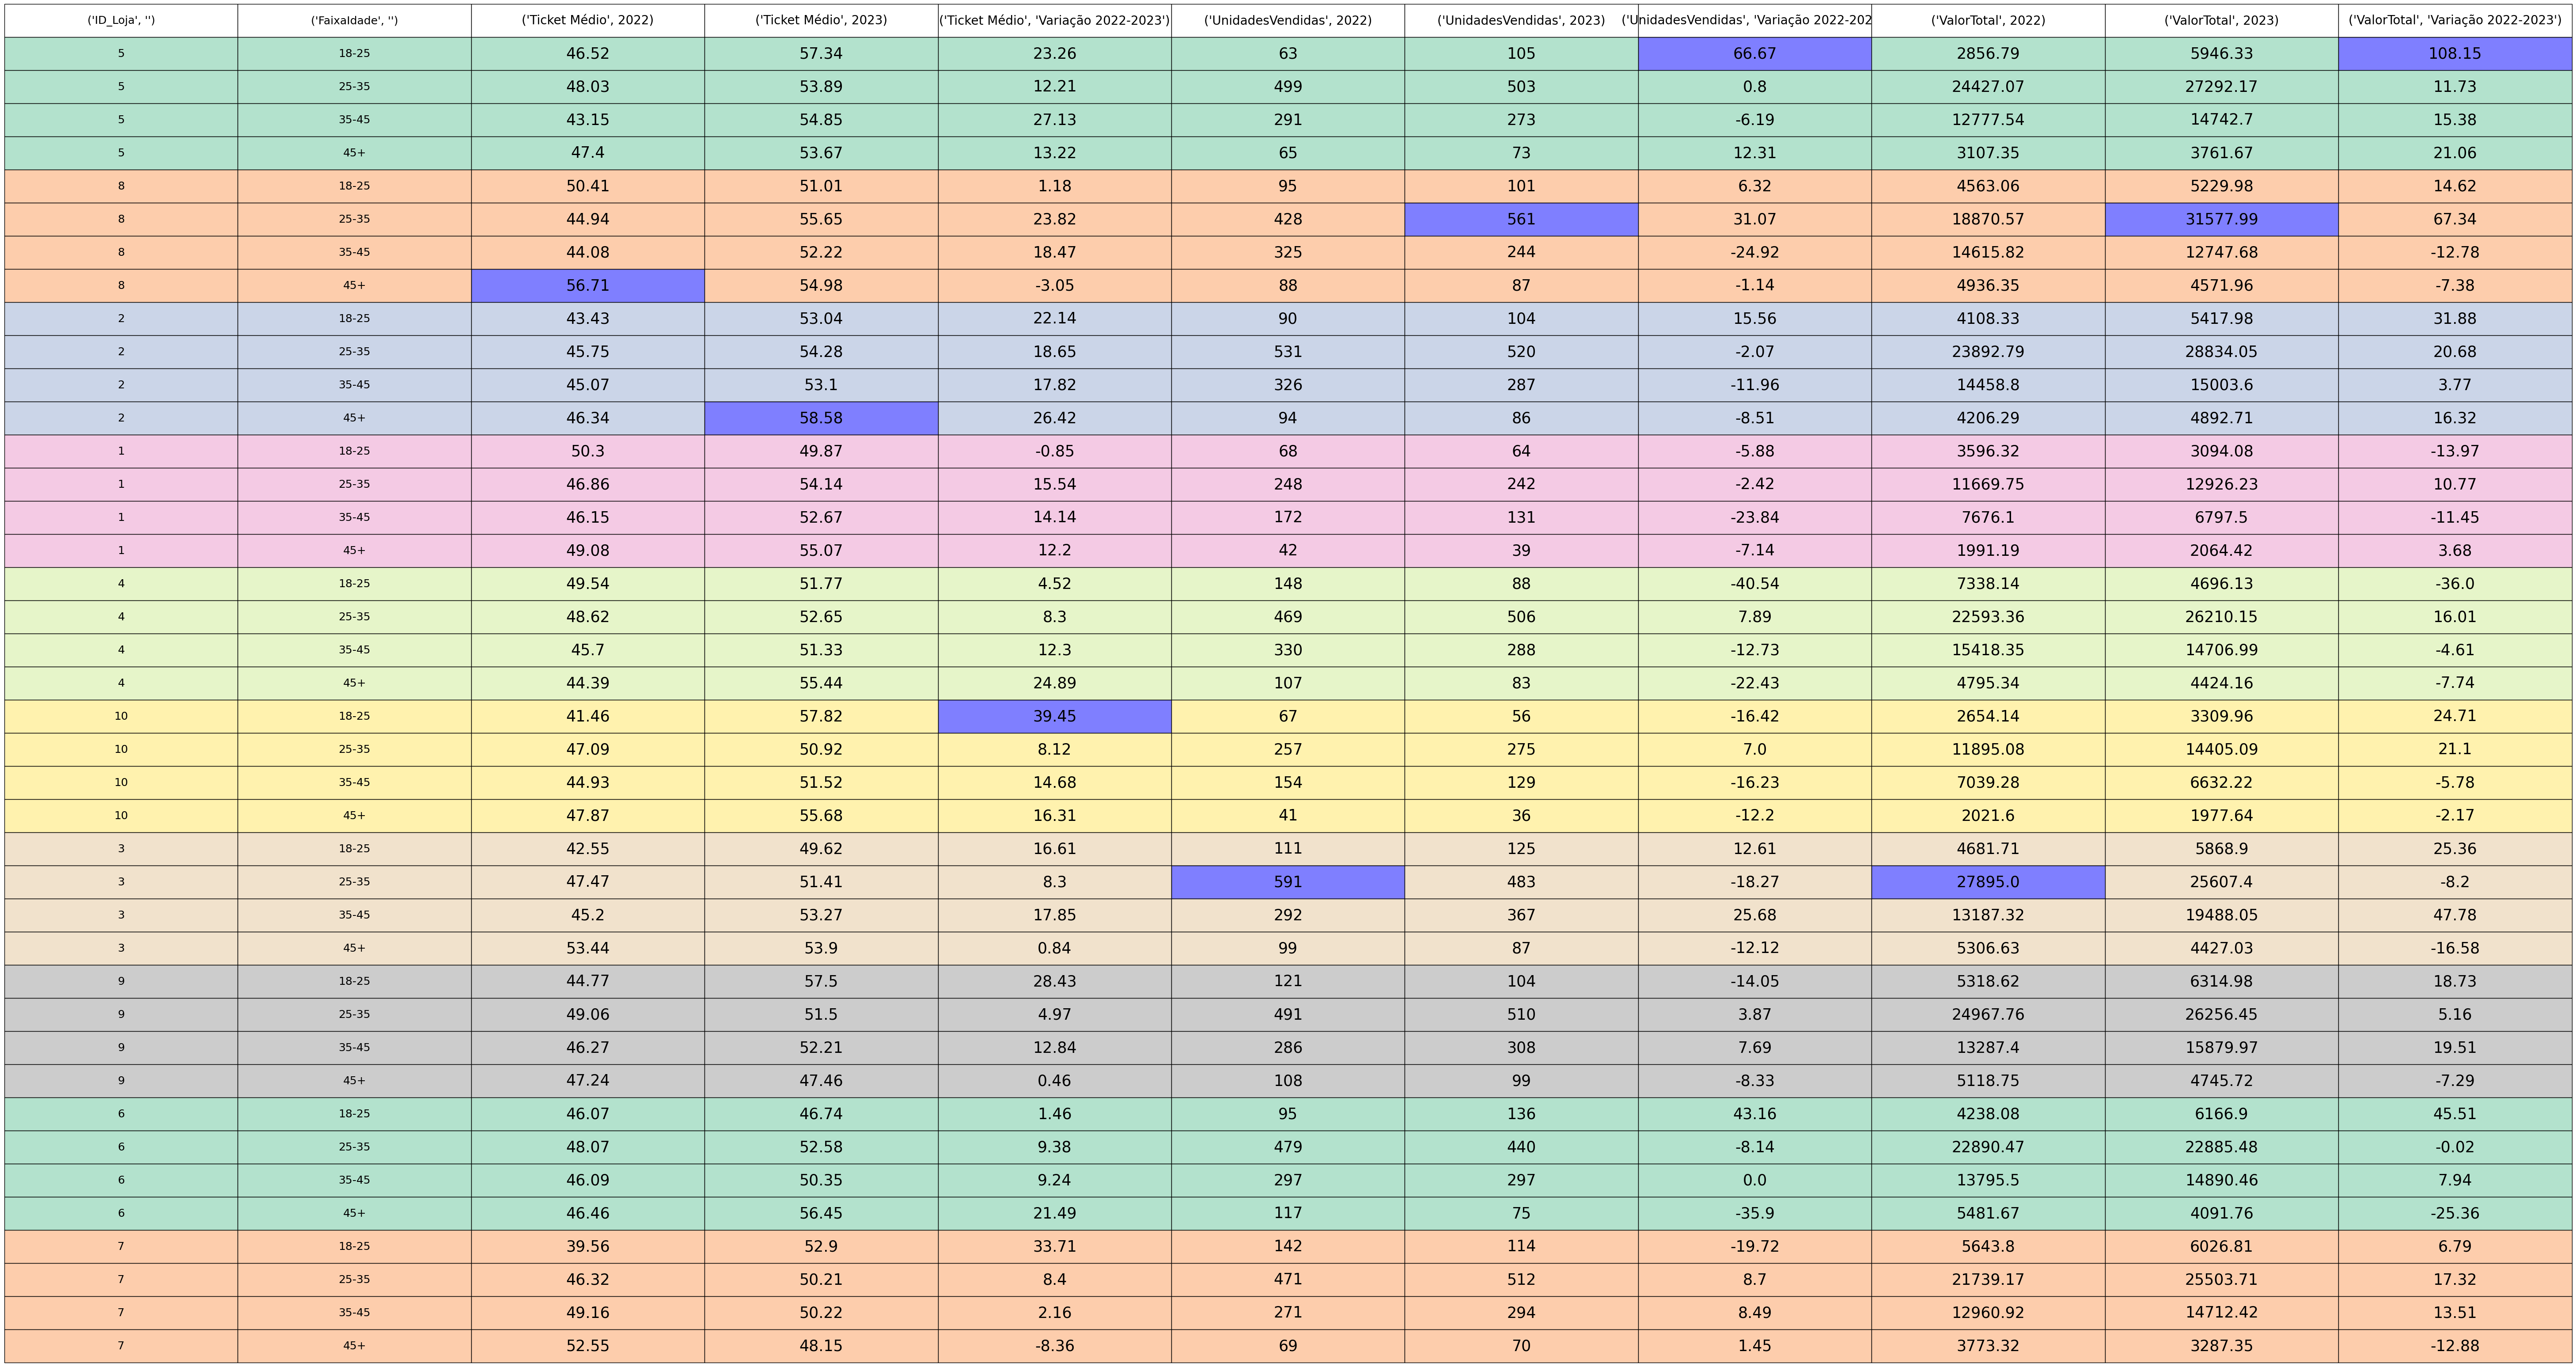

In [54]:
df_grouped_unique = df_final.groupby(['ID_Loja', 'Year','FaixaIdade']).agg({'Ticket Médio': 'mean',
    'UnidadesVendidas': 'sum',
    'ValorTotal': 'sum'})
df_pivot = df_grouped_unique.reset_index().pivot_table(index=['ID_Loja', 'FaixaIdade'], columns='Year', values=['Ticket Médio', 'UnidadesVendidas', 'ValorTotal'])


df_sorted_2023 = df_sorted.loc[(slice(None), 2023), ['Rank_Ticket_Medio']]
df_sorted_2023_sorted = df_sorted_2023.sort_values(by='Rank_Ticket_Medio')
id_loja_list = df_sorted_2023_sorted.index.get_level_values('ID_Loja').tolist()


df_pivot_reindexed = df_pivot.reindex(id_loja_list, level='ID_Loja')


import matplotlib.pyplot as plt
import numpy as np

# Calculate the variation for each column
for col in ['Ticket Médio', 'ValorTotal', 'UnidadesVendidas']:
    df_pivot_reindexed[(col, 'Variação 2022-2023')] = ((df_pivot_reindexed[(col, 2023)] - df_pivot_reindexed[(col, 2022)]) / df_pivot_reindexed[(col, 2022)]) * 100

# Fill NaN values with 0
df_pivot_reindexed = df_pivot_reindexed.fillna(0)

# Reindex the columns
df_pivot_reindexed = df_pivot_reindexed.reindex([
    ('Ticket Médio', 2022),
    ('Ticket Médio', 2023),
    ('Ticket Médio', 'Variação 2022-2023'),
    ('UnidadesVendidas', 2022),
    ('UnidadesVendidas', 2023),
    ('UnidadesVendidas', 'Variação 2022-2023'),
    ('ValorTotal', 2022),
    ('ValorTotal', 2023),
    ('ValorTotal', 'Variação 2022-2023')
], axis=1)

# Define the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Add the table to the figure
table_data = df_pivot_reindexed.reset_index().round(2).values.tolist()
column_labels = df_pivot_reindexed.reset_index().columns.tolist()

# Create a color dictionary for each 'ID_Loja'
id_loja_colors = {id_loja: colors[i % len(colors)] for i, id_loja in enumerate(df_pivot_reindexed.index.get_level_values('ID_Loja').unique())}

# Create a color matrix based on 'ID_Loja'
cell_colors = [[id_loja_colors[row[0]] for _ in row] for row in table_data]

# Highlight the largest numbers in each column, skipping the first two columns
for i in range(2, len(table_data[0])):
    column_data = [row[i] for row in table_data]
    max_value = max(column_data)
    for j in range(len(table_data)):
        if table_data[j][i] == max_value:
            cell_colors[j][i] = (0, 0, 1, 0.5)  # Semi-transparent blue

# Add the table to the figure
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center', cellColours=cell_colors)

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(16)

# Increase the overall width and height of the table
table.scale(5, 4.5)

# Increase the font size
table.set_fontsize(25)

# Adjust the font size of the headers
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_fontsize(20)

# Adjust the font size of 'ID_Loja' and 'FaixaIdade' columns
for key, cell in table.get_celld().items():
    if key[1] in [0, 1]:
        cell.set_fontsize(18)

# Hide the axes
ax.axis('off')

# Save the figure as .png
plt.savefig('df_pivot_reindexed_table.png')



In [55]:
# liberando espaço na memória
# Get a dictionary of all variables in your current namespace
variables = locals()

# Convert the items to a list before iterating
for var_name, var_value in list(variables.items()):
    if isinstance(var_value, pd.DataFrame) and var_name != 'df_final':
        del variables[var_name]

___

timeseries

In [56]:

# Carregar o arquivo Excel
xls = pd.ExcelFile('Exercicio_Python_CRM .xlsx')

# Obter os nomes das abas
sheet_names = xls.sheet_names

# Para cada aba, ler o schema e as primeiras 10 linhas
for sheet in sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet, nrows=10)
    # print(f"Schema para {sheet}:")
    # print(df.dtypes)
    # print(f"Primeiras 10 linhas para {sheet}:")
    # print(df.head(10))


import openpyxl

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de transações
ws = wb['Transações']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_t = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_t.columns:
    # Se o tipo de dados da coluna é object (string)
    if df_t[col].dtype == 'object':
        # Remova os espaços em branco no início e no final
        df_t[col] = df_t[col].str.strip()

df_t['Promo'] = df_t['Promo'].astype(str)
cols = [col for col in df_t.columns if 'ID' not in col]
null_counts = df_t.isnull().sum()

In [57]:
#!pip install pystan

In [60]:
pip install holidays==0.10.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.



     ---------------------------------------- 0.0/111.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/111.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/111.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/111.0 kB 262.6 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/111.0 kB 363.1 kB/s eta 0:00:01
     ------------------------------------ 111.0/111.0 kB 496.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for holidays: filename=holidays-0.10.2-py3-none-any.whl size=111633 sha256=24ed734f4ae4999321a1a9d349f2ed77f961e56c1f048a7126c18b4f66af36fd
  Stored in directory: c:\users\surze\appdata\local\pip\cache\wheels\21\02\81\a57f54bf80a21ed502a48aac7f9737296463648f30bb446c27
Successfully built holidays
  Attempting uninstall: holidays
    Found existing installation: holidays 0.44
    Uninstalling holidays-0.44:
      Succe

In [63]:
!pip install cmdstanpy==0.9.5

In [64]:
!pip install pystan numpy pandas matplotlib lunarcalendar convertdate holidays setuptools-git python-dateutil pytz tqdm

In [66]:
!pip install holidays==0.10.2

In [67]:
!pip install fbprophet==0.6

  Using cached fbprophet-0.6.tar.gz (54 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.4.0-py3-none-any.whl.metadata (2.5 kB)
Using cached cmdstanpy-0.4.0-py3-none-any.whl (22 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [885 lines of output]
      C:\Users\surze\AppData\Local\Temp\pip-install-kl65412s\fbprophet_b6817173f41741d08d16337e2ad5d8cc\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib
      creating build\lib\fbprophet
      creating build\lib\fbprophet\stan_model
      Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
      NumExpr defaulting to 8 threads.
      COMPILING THE C++ CODE FOR MODEL anon_model_ad32c37d592cdbc572cbc332ac6d2ee2 NOW.
      MSVC compiler is not supported
      stanfit4anon_model_ad32c37d592cdbc572cbc332ac6d2ee2_6534932641014507953.cpp
      C:\Users\surze\anaconda3\envs\pro

Sure, here are the detailed steps to install the "C++ build tools" workload:

1. Download the Build Tools for Visual Studio 2019 from the Microsoft website. Here is the link: https://visualstudio.microsoft.com/visual-cpp-build-tools/

2. Run the downloaded installer. This will open the Visual Studio Installer.

3. In the Visual Studio Installer, you will see a list of workloads to choose from. 

4. Scroll down to find the "C++ build tools" workload. Click on the checkbox next to it to select it.

5. On the right side, you will see a summary of the installation details. Make sure "MSVC v142 - VS 2019 C++ x64/x86 build tools" and "Windows 10 SDK" are included in the installation. If not, click on the checkbox next to them to select them.

6. Click on the "Install" button at the bottom right to start the installation.

7. Wait for the installation to complete. This may take some time depending on your internet speed.

8. Once the installation is complete, close the Visual Studio Installer.

Now, you should have the C++ build tools installed on your system. You can verify the installation by opening a new command prompt and running the `cl` command. If the installation was successful, you should see a message about the Microsoft (R) C/C++ Optimizing Compiler.

In [58]:
#!conda install -c conda-forge fbprophet

In [69]:
!pip install statsmodels

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB 163.8 kB/s eta 0:01:02
   ---------------------------------------- 0.0/10.0 MB 178.6 kB/s eta 0:00:56
   ---------------------------------------- 0.1/10.0 MB 261.4 kB/s eta 0:00:39
   ---------------------------------------- 0.1/10.0 MB 359.9 kB/s eta 0:00:28
    --------------------------------------- 0.2/10.0 MB 416.7 kB/s eta 0:00:24
    --------------------------------------- 0.2/10.0 MB 478.0 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.0 MB 514.3 kB/s eta 0:00:20
   - -------------------------------------- 0.3/10.0 MB 570.1 kB/s eta 0:00:18
   - -------------

In [59]:
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Prepare the data
df = df_t[['Data', 'UnidadesVendidas']].rename(columns={'Data': 'ds', 'UnidadesVendidas': 'y'})

# Split the data
train = df[df['ds'] < df['ds'].max() - pd.DateOffset(months=1)]
test = df[df['ds'] >= df['ds'].max() - pd.DateOffset(months=1)]

# Create and fit the model
model = Prophet()
model.fit(train)

# Make predictions
forecast = model.predict(test[['ds']])

# Calculate MAPE
mape = mean_absolute_percentage_error(test['y'], forecast['yhat'])
print(f'MAPE: {mape}')

# Plot actual vs predicted
plt.figure(figsize=(10, 7))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.show()

# Plot seasonality
model.plot_components(forecast)
plt.show()

TypeError: This is a python-holidays entity loader class. For entity inheritance purposes please import a class you want to derive from directly: e.g., `from holidays.countries import Entity` or `from holidays.financial import Entity`.

In [71]:
!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.3 MB 469.7 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.3 MB 525.1 kB/s eta 0:00:18
   ---------------------------------------- 0.1/9.3 MB 525.1 kB/s eta 0:00:18
    --------------------------------------- 0.1/9.3 MB 532.5 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.3 MB 510.2 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.3 MB 562.0 kB/s eta 0:00:17
   - -------------------------------------- 0.2/9.3 MB 577.6 kB/s eta 0:00:16
   - -------------------------------------- 0.3/9.3 MB 568.9 kB/s eta 0:00:16
   - -------------------------------------- 0.3/9.3 MB 576.6 kB/s eta 0:00:16
   - -------------------------------------- 0.3/9.3 MB 578.5 kB/s eta 0:00:16
   -

In [74]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Trans          7791 non-null   int64         
 1   Data              7791 non-null   datetime64[ns]
 2   ID_Loja           7791 non-null   int64         
 3   ID_Produto        7791 non-null   int64         
 4   ID_Cliente        7791 non-null   int64         
 5   UnidadesVendidas  7791 non-null   int64         
 6   ValorTotal        7791 non-null   float64       
 7   Promo             7791 non-null   object        
 8   ds                7791 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 547.9+ KB


MAPE: 0.7586661093017955


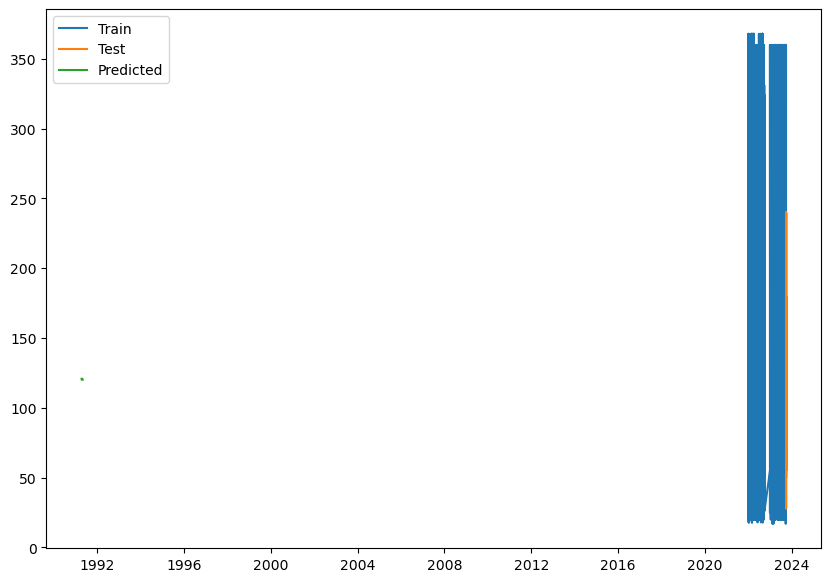

In [76]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# **1. Assuming you already have a DataFrame called df_t** 
#    If not, you'll need to load your data first and create df_t.

# **2. Prepare the data (assuming 'Data' is your date column)**
df_t['ds'] = pd.to_datetime(df_t['Data'])  # Ensure 'ds' is in datetime format

# **3. Split the data into training and testing sets**
train = df_t[df_t['ds'] < df_t['ds'].max() - pd.DateOffset(days=1)]
test = df_t[df_t['ds'] >= df_t['ds'].max() - pd.DateOffset(days=1)]

# **4. Create an ARIMA model**
model = ARIMA(train['ValorTotal'], order=(2, 1, 1))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# **5. Make predictions**
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# **6. Calculate MAPE**
mape = mean_absolute_percentage_error(test['ValorTotal'], forecast)
print(f'MAPE: {mape}')

# **7. Plot actual vs predicted**
plt.figure(figsize=(10, 7))
plt.plot(train['ds'], train['ValorTotal'], label='Train')
plt.plot(test['ds'], test['ValorTotal'], label='Test')
plt.plot(forecast.index, forecast, label='Predicted')  
plt.legend()
plt.show()

c:\Users\surze\anaconda3\envs\prophet_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\surze\anaconda3\envs\prophet_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\surze\anaconda3\envs\prophet_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



MAPE: 0.7889643181019962


c:\Users\surze\anaconda3\envs\prophet_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



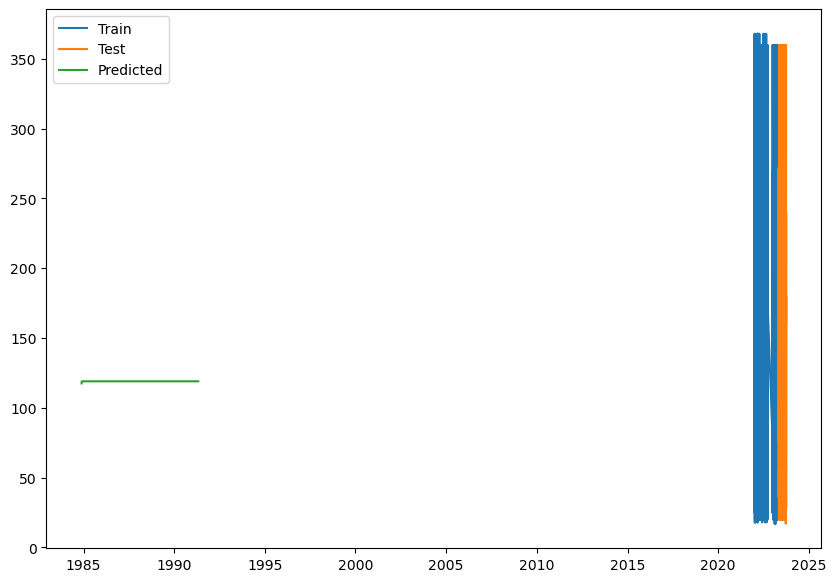

In [80]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# **1. Assuming you already have a DataFrame called df_t** 
#    If not, you'll need to load your data first and create df_t.

# **2. Prepare the data (assuming 'Data' is your date column)**
df_t['ds'] = pd.to_datetime(df_t['Data'])  # Ensure 'ds' is in datetime format

# **2.1 Sort the DataFrame by date**
df_t = df_t.sort_values('ds')

# **3. Split the data into training and testing sets**
split_date = df_t['ds'].quantile(0.7)  # Find the date that splits the data into 70% training and 30% testing
train = df_t[df_t['ds'] < split_date]
test = df_t[df_t['ds'] >= split_date]

# **4. Create an ARIMA model**
model = ARIMA(train['ValorTotal'], order=(2, 1, 1))  # Adjust the order (p, d, q) as needed
model_fit = model.fit()

# **5. Make predictions**
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# **6. Calculate MAPE**
mape = mean_absolute_percentage_error(test['ValorTotal'], forecast)
print(f'MAPE: {mape}')

# **7. Plot actual vs predicted**
plt.figure(figsize=(10, 7))
plt.plot(train['ds'], train['ValorTotal'], label='Train')
plt.plot(test['ds'], test['ValorTotal'], label='Test')
plt.plot(forecast.index, forecast, label='Predicted')  
plt.legend()
plt.show()

In [79]:
df_t['Data'].min()

Timestamp('2022-01-01 00:00:00')

In [81]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# **1. Assuming you already have a DataFrame called df_t** 
#    If not, you'll need to load your data first and create df_t.

# **2. Prepare the data (assuming 'Data' is your date column)**
df_t['ds'] = pd.to_datetime(df_t['Data'])  # Ensure 'ds' is in datetime format
df_t['y'] = df_t['ValorTotal']  # Prophet requires the target variable to be named 'y'

# **2.1 Sort the DataFrame by date**
df_t = df_t.sort_values('ds')

# **3. Split the data into training and testing sets**
split_date = df_t['ds'].quantile(0.7)  # Find the date that splits the data into 70% training and 30% testing
train = df_t[df_t['ds'] < split_date]
test = df_t[df_t['ds'] >= split_date]

# **4. Create a Prophet model**
model = Prophet()
model.fit(train)

# **5. Make predictions**
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# **6. Calculate MAPE**
mape = mean_absolute_percentage_error(test['y'], forecast['yhat'][-len(test):])
print(f'MAPE: {mape}')

# **7. Plot actual vs predicted**
model.plot(forecast)
plt.show()

TypeError: This is a python-holidays entity loader class. For entity inheritance purposes please import a class you want to derive from directly: e.g., `from holidays.countries import Entity` or `from holidays.financial import Entity`.

___

##### Quarta parte da análise:
- Teste

###### nesta quarta parte da análise é possível verificar que:
O valor de p é 0,185 ou 18,5%. Um valor de p menor que 0,05 geralmente é considerado evidência forte o suficiente para rejeitar a hipótese nula e aceitar a hipótese alternativa.

- H0 (Hipótese nula): O teste não rejeita a hipótese nula pois não há associação significativa entre "Grupo" e "Comprou". Em outras palavras, a taxa de compra é praticamente a mesma para os grupos 'CONTROLE' e 'TESTE'.

- H1 (Hipótese alternativa): O Teste rejeita hipótese alternativa que seria uma associação significativa entre "Grupo" e "Comprou".

Portanto não houve diferença significativa entre o Modelo ANTIGO e NOVO de disparo de e-mails.



In [ ]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Cliente
ws = wb['Cliente']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_c = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_c.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_c[col]):
        # Remova os espaços em branco no início e no final
        df_c[col] = df_c[col].str.strip()

In [ ]:
import openpyxl
import pandas as pd

# arquivo
wb = openpyxl.load_workbook('Exercicio_Python_CRM .xlsx', read_only=True)

# aba de Teste
ws = wb['Teste']

# tamanho do chunk para leitura de bases grandes
chunk_size = 100000
chunks = []

# cabeçalho (nomes das colunas) da primeira linha
header = [cell.value for cell in ws[1]]

# dados em chunks para bases com milhões de linhas
for i in range(2, ws.max_row, chunk_size):  # Comecça de 2 porque a primeira linha é o cabeçalho
    rows = ws[i:i + chunk_size]
    data = [[cell.value for cell in row] for row in rows]
    df = pd.DataFrame(data, columns=header)  # Usando o cabeçalho como nomes das colunas
    chunks.append(df)

# Concatenando os chunks em um único DataFrame
df_tst = pd.concat(chunks, axis=0)

# Para cada coluna no DataFrame
for col in df_tst.columns:
    # Se o tipo de dados da coluna é object (string)
    if pd.api.types.is_object_dtype(df_tst[col]):
        # Remova os espaços em branco no início e no final
        df_tst[col] = df_tst[col].str.strip()

In [ ]:
df_c = df_c.dropna(axis=1, how='all')

In [ ]:
non_conforming_rows = df_tst.loc[
    ((df_tst['Enviado'] == 0) & (df_tst['Aberto'] != 0)) |
    ((df_tst['Enviado'] == 0) & (df_tst['Sessao'] != 0)) |
    ((df_tst['Recebido'] == 0) & (df_tst['Aberto'] != 0)) |
    ((df_tst['Aberto'] == 0) & (df_tst['Sessao'] != 0))
]

In [ ]:
df_tst = df_tst.drop(non_conforming_rows.index)
df_merged = df_tst.merge(df_c, on='CustomerID', how='left')

In [ ]:
# Group by 'Grupo' and calculate the mean of 'Comprou'
conversion_rate = df_merged.groupby('Grupo')['Comprou'].mean()

# Reset the index of the conversion_rate Series to convert it into a DataFrame
cr = conversion_rate.reset_index()

# Rename the columns
cr.columns = ['Grupo', 'conversion_rate']
# Group by 'Grupo' and calculate the mean of 'Aberto'
opening_rate = df_merged.groupby('Grupo')['Aberto'].mean()

o_r = opening_rate.reset_index()

# Rename the columns
o_r.columns = ['Grupo', 'opening_rate']
#o_r
# Assuming o_r is a DataFrame with a 'Grupo' column
merged_df = cr.merge(o_r, on='Grupo')
merged_df['conversion_rate'] = ((merged_df['conversion_rate'] * 100).round(2)).astype(str) + '%'
merged_df['opening_rate'] = ((merged_df['opening_rate'] * 100).round(2)).astype(str) + '%'

merged_df

Grupo conversion_rate opening_rate
0  CONTROLE          58.49%       86.79%
1     TESTE          73.33%       91.11%

In [ ]:
import statsmodels.api as sm
from scipy import stats

# Criando a tabela de contingência
tabela_contingencia = pd.crosstab(df_merged['Grupo'], df_merged['Comprou'])

# Realizando o teste
chi2, p, df, expected = stats.chi2_contingency(tabela_contingencia)

# Imprimindo os resultados
print("Valor de p:", p)

# Se p < 0.05, há significância estatística
if p < 0.05:
    print("Existe relação significativa entre Grupo e Comprou")
else:
    print("Não há relação significativa entre Grupo e Comprou")


Valor de p: 0.1850463335809991
Não há relação significativa entre Grupo e Comprou


In [ ]:
import os

os.system('jupyter nbconvert --no-input --to html crm_v6.ipynb')

0